In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 50
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Настройка параметров pandas.<br><br>

In [3]:
df = pd.read_csv('in_actions.csv', index_col='id')

In [4]:
df.head(5)

,vydacha_dt,activation_dt,pro0,pro1,pro2,chastotta,tran_type_month0,tran_type_month1,tran_type_month2,FREE_LIMIT0,FREE_LIMIT1,FREE_LIMIT2,limit,login_0,login_1,login_2,withdraw0,withdraw1,withdraw2,cred_tran_nopartnershare0,cred_tran_nopartnershare1,cred_tran_nopartnershare2,cl_age,GENDER_ID,tran_prod,tran_remont,tran_inet,CRED_TRAN_TOTAL,CREDIT_TRAN_AMT_last_month,CL_CHILDREN_NO,City_Population_category,cl_income,count_tran2,counttran1,count_tran0,tran_amt2,tran_amt1,tran_amt0,avg_amt_prod_3m,avg_amt_vnebs_3m,avg_amt_avto_3m,avg_amt_inet_3m,churn,product_type,top_cat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-01-30 00:00:00.000,2021-11-22 00:00:00.000,1,1,1,secondhalf,CRED,CRED+DEB,CRED,3928.86,3377.52,6610.81,21000.00,6.00,NaN,NaN,"62,77132906990466","66,77646944125122","27,17490467431653",0.08,0.50,0.88,66,1.00,2.00,0.00,0.00,1,6181.07,-1.00,300 – 700 тыс,1176000.00,17,7,7,6181.07,6698.46,17071.14,335.94,411.07,NaN,NaN,0,card only,Products
2,2021-11-12 00:00:00.000,2021-11-12 00:00:00.000,0,0,1,firsthalf,CRED+DEB,CRED+DEB,CRED,14520.00,17162.56,16002.56,75000.00,6.00,32.00,24.00,0,0,0,NaN,NaN,NaN,54,2.00,0.00,0.00,0.00,1,1160.00,0.00,0 – 100 тыс,444000.00,4,4,14,1160.00,1700.00,76862.33,NaN,NaN,NaN,NaN,0,only self pickup,Furniture
3,2021-06-17 00:00:00.000,2021-11-22 00:00:00.000,1,1,1,secondhalf,CRED,CRED,CRED,14869.29,45149.45,40638.27,75000.00,7.00,27.00,10.00,"9,277231048321518","9,579041518797426",0,0.34,0.78,0.75,54,2.00,2.00,0.00,0.00,1,15111.64,-1.00,300 – 700 тыс,960000.00,10,2,16,15111.64,719.35,60130.71,199.00,903.55,NaN,NaN,0,only self pickup,Products
4,2021-11-08 00:00:00.000,2021-11-08 00:00:00.000,1,1,1,secondhalf,CRED+DEB,CRED+DEB,CRED+DEB,90000.00,90000.00,83629.25,90000.00,11.00,21.00,15.00,0,0,0,NaN,0.19,0.29,40,2.00,33.00,0.00,1.00,1,9157.78,0.00,0 – 100 тыс,744000.00,18,75,28,8928.04,69845.52,15572.95,400.65,612.68,749.78,NaN,0,plus credit,Products
5,2021-11-28 00:00:00.000,2021-11-28 00:00:00.000,1,1,1,secondhalf,CRED,CRED,CRED,44950.00,346.72,167.87,45000.00,11.00,6.00,16.00,0,0,0,NaN,NaN,NaN,43,2.00,11.00,0.00,0.00,1,2658.89,-1.00,>700 тыс,600000.00,3,13,1,3370.89,44603.28,50.00,1853.11,NaN,NaN,NaN,0,PMM,Products


In [5]:
df.shape

(12988, 45)

In [6]:
df.isnull().any(axis=0)

vydacha_dt                    False
activation_dt                 False
pro0                          False
pro1                          False
pro2                          False
chastotta                     False
tran_type_month0              False
tran_type_month1              False
tran_type_month2              False
FREE_LIMIT0                    True
FREE_LIMIT1                    True
FREE_LIMIT2                    True
limit                         False
login_0                        True
login_1                        True
login_2                        True
withdraw0                     False
withdraw1                     False
withdraw2                     False
cred_tran_nopartnershare0      True
cred_tran_nopartnershare1      True
cred_tran_nopartnershare2      True
cl_age                        False
GENDER_ID                      True
tran_prod                      True
tran_remont                    True
tran_inet                      True
CRED_TRAN_TOTAL             

In [7]:
df['vydacha_dt'] = pd.to_datetime(df['vydacha_dt'])
df['activation_dt'] = pd.to_datetime(df['activation_dt'])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pro0,12988.00,0.57,0.49,0.00,0.00,1.00,1.00,1.00
pro1,12988.00,0.58,0.49,0.00,0.00,1.00,1.00,1.00
pro2,12988.00,0.58,0.49,0.00,0.00,1.00,1.00,1.00
FREE_LIMIT0,12986.00,43060.60,60946.40,-2982830.00,20393.58,44509.51,60000.00,500000.00
FREE_LIMIT1,12986.00,36569.19,60100.35,-2982830.00,11243.47,35665.80,54295.92,500000.00
FREE_LIMIT2,12986.00,33779.77,59561.11,-2882204.11,5919.40,30999.75,50189.02,500000.00
limit,12988.00,65849.88,31032.61,100.10,45000.00,60000.00,75000.00,500000.00
login_0,12872.00,9.50,11.16,1.00,3.00,6.00,12.00,305.00
login_1,12403.00,12.00,12.47,1.00,4.00,8.00,15.00,195.00
login_2,11926.00,12.10,14.50,1.00,4.00,8.00,15.00,502.00


In [9]:
# num_cat_feats = df.loc[:, df.nunique() < 11].columns.to_list()
# # print(num_cat_feats)
# num_feats = df.loc[:, df.nunique() >= 11].columns.to_list()
# print(num_feats)
# cat_feats = df.select_dtypes(include=[object]).columns.to_list()
# print(cat_feats)

df.rename(columns={'counttran1': 'count_tran1'}, inplace=True)

date_feats = ['vydacha_dt', 'activation_dt']
cat_feats = ['pro0', 'pro1', 'pro2', 'chastotta', 'tran_type_month0', 'tran_type_month1', 'tran_type_month2', 'GENDER_ID', 'CRED_TRAN_TOTAL', 'CL_CHILDREN_NO', 'City_Population_category', 'product_type', 'top_cat']
num_feats = ['FREE_LIMIT0', 'FREE_LIMIT1', 'FREE_LIMIT2', 'limit', 'login_0', 'login_1', 'login_2', 'withdraw0', 'withdraw1', 'withdraw2', 'cred_tran_nopartnershare0', 'cred_tran_nopartnershare1', 'cred_tran_nopartnershare2', 'cl_age', 'tran_prod', 'tran_remont', 'tran_inet', 'CREDIT_TRAN_AMT_last_month', 'cl_income', 'count_tran2', 'count_tran1', 'count_tran0', 'tran_amt2', 'tran_amt1', 'tran_amt0', 'avg_amt_prod_3m', 'avg_amt_vnebs_3m', 'avg_amt_avto_3m', 'avg_amt_inet_3m']
target = ['churn']

df['withdraw0'] = df['withdraw0'].str.replace(',', '.').astype(float) / 100
df['withdraw1'] = df['withdraw1'].str.replace(',', '.').astype(float) / 100
df['withdraw2'] = df['withdraw2'].str.replace(',', '.').astype(float) / 100

Приведение названия признака количество транзакций во второй месяц к общему виду.<br>
Конвертируем withdraw во float.

<br>
<hr>
<h3>Числовые признаки</h3>
<br>

In [10]:
df[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
FREE_LIMIT0,12986.00,43060.60,60946.40,-2982830.00,20393.58,44509.51,60000.00,500000.00
FREE_LIMIT1,12986.00,36569.19,60100.35,-2982830.00,11243.47,35665.80,54295.92,500000.00
FREE_LIMIT2,12986.00,33779.77,59561.11,-2882204.11,5919.40,30999.75,50189.02,500000.00
limit,12988.00,65849.88,31032.61,100.10,45000.00,60000.00,75000.00,500000.00
login_0,12872.00,9.50,11.16,1.00,3.00,6.00,12.00,305.00
login_1,12403.00,12.00,12.47,1.00,4.00,8.00,15.00,195.00
login_2,11926.00,12.10,14.50,1.00,4.00,8.00,15.00,502.00
withdraw0,12988.00,0.08,0.20,0.00,0.00,0.00,0.00,1.00
withdraw1,12988.00,0.08,0.20,0.00,0.00,0.00,0.00,1.00
withdraw2,12988.00,0.05,0.18,0.00,0.00,0.00,0.00,1.00


Что означает <b>cl_income = -1</b>?<br><br>

In [11]:
print(df[num_feats].isnull().any(axis=0))

FREE_LIMIT0                    True
FREE_LIMIT1                    True
FREE_LIMIT2                    True
limit                         False
login_0                        True
login_1                        True
login_2                        True
withdraw0                     False
withdraw1                     False
withdraw2                     False
cred_tran_nopartnershare0      True
cred_tran_nopartnershare1      True
cred_tran_nopartnershare2      True
cl_age                        False
tran_prod                      True
tran_remont                    True
tran_inet                      True
CREDIT_TRAN_AMT_last_month     True
cl_income                     False
count_tran2                   False
count_tran1                   False
count_tran0                   False
tran_amt2                     False
tran_amt1                     False
tran_amt0                     False
avg_amt_prod_3m                True
avg_amt_vnebs_3m               True
avg_amt_avto_3m             

<b>17 признаков</b> содержат пустые значения

<br>
<h4>Признак FREE_LIMIT</h4>
Свободный лимит по 3 месяцам

In [12]:
print(df[df['FREE_LIMIT0'].isnull()].shape[0])
print(df[df['FREE_LIMIT1'].isnull()].shape[0])
print(df[df['FREE_LIMIT2'].isnull()].shape[0])
print(df[df['FREE_LIMIT0'].isnull()].index)
print(df[df['FREE_LIMIT1'].isnull()].index)
print(df[df['FREE_LIMIT2'].isnull()].index)

df.drop(axis=0, index=df[df['FREE_LIMIT0'].isnull()].index, inplace=True)


2
2
2
Int64Index([642, 2464], dtype='int64', name='id')
Int64Index([642, 2464], dtype='int64', name='id')
Int64Index([642, 2464], dtype='int64', name='id')


Удаляем клиентов (2) для которых FREE_LIMIT = NaN.<br><br>

In [13]:
free_limits = ['FREE_LIMIT0', 'FREE_LIMIT1', 'FREE_LIMIT2']
print(df[free_limits].describe())
print(df.loc[df['FREE_LIMIT0'] < 0].shape)
print(df.loc[df['FREE_LIMIT1'] < 0].shape)
print(df.loc[df['FREE_LIMIT2'] < 0].shape)

       FREE_LIMIT0  FREE_LIMIT1  FREE_LIMIT2
count     12986.00     12986.00     12986.00
mean      43060.60     36569.19     33779.77
std       60946.40     60100.35     59561.11
min    -2982830.00  -2982830.00  -2882204.11
25%       20393.58     11243.47      5919.40
50%       44509.51     35665.80     30999.75
75%       60000.00     54295.92     50189.02
max      500000.00    500000.00    500000.00
(23, 45)
(26, 45)
(31, 45)


Имеются отрицательные значения FREE_LIMIT.<br><br>

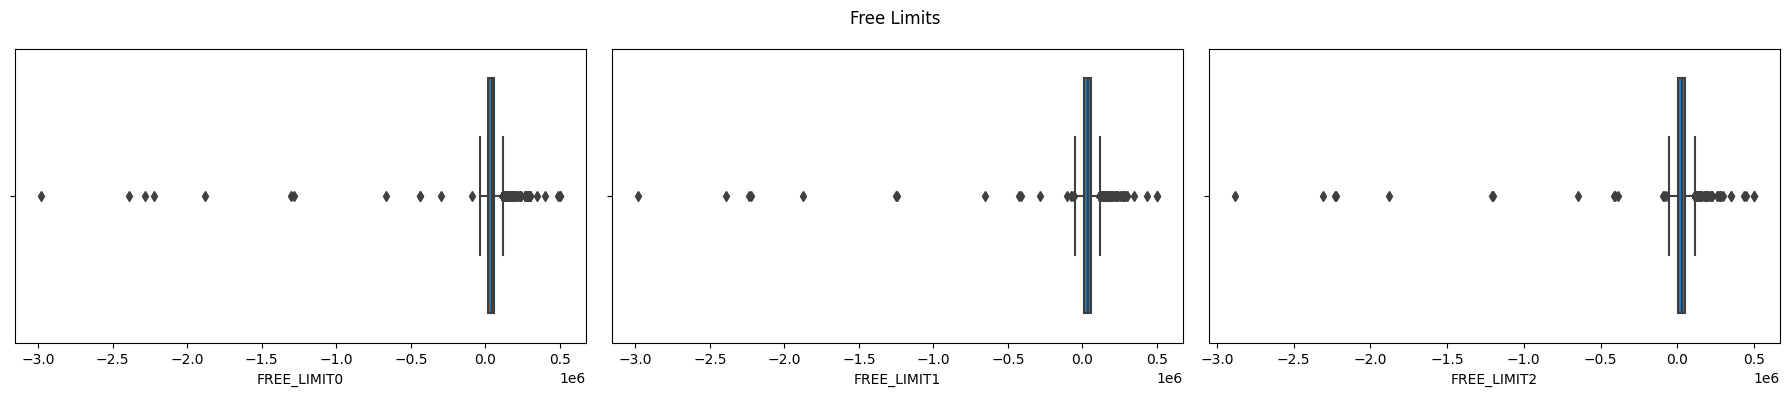

In [14]:
fig = plt.figure(figsize=(len(free_limits) * 6, 4))
for i, feat_name in enumerate(free_limits):
    ax = fig.add_subplot(1, len(free_limits), i+1)
    sns.boxplot(data=df, x=feat_name)
    fig.suptitle('Free Limits')

plt.tight_layout()

In [15]:
z = np.abs(stats.zscore(df['FREE_LIMIT0']))
df.drop(axis=0, index=df.loc[z>=3, 'FREE_LIMIT0'].index, inplace=True)

z = np.abs(stats.zscore(df['FREE_LIMIT1']))
df.drop(axis=0, index=df.loc[z>=3, 'FREE_LIMIT1'].index, inplace=True)

z = np.abs(stats.zscore(df['FREE_LIMIT2']))
df.drop(axis=0, index=df.loc[z>=3, 'FREE_LIMIT2'].index, inplace=True)

Удаляем выбросы.

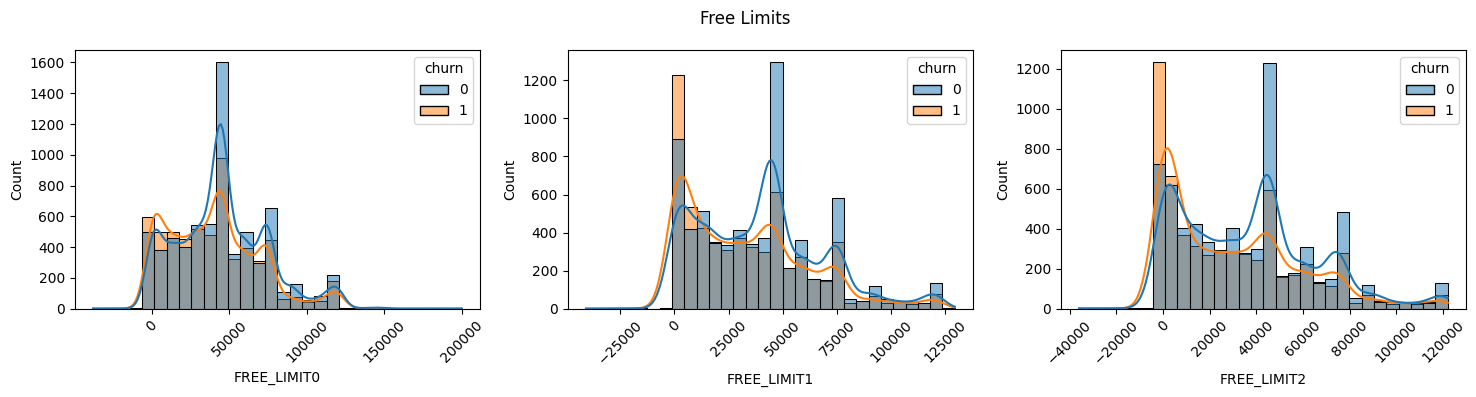

In [16]:
fig = plt.figure(figsize=(len(free_limits) * 5, 4))
for i, feat_name in enumerate(free_limits):
    ax = fig.add_subplot(1, len(free_limits), i+1)
    sns.histplot(data = df, x=feat_name, hue='churn', bins=30, kde=True, axes=ax)
    fig.suptitle('Free Limits')
    plt.xticks(rotation=45)
plt.tight_layout()

Клиенты, у которых свободный лими в третьм месяце близок к 0, чаще уходят.

<br>
<h4>Признак limit</h4>
Лимит.

In [17]:
df['limit'].describe()

count    12824.00
mean     64383.83
std      26760.17
min        100.10
25%      45000.00
50%      60000.00
75%      75000.00
max     300000.00
Name: limit, dtype: float64

Text(0.5, 1.0, 'Limits')

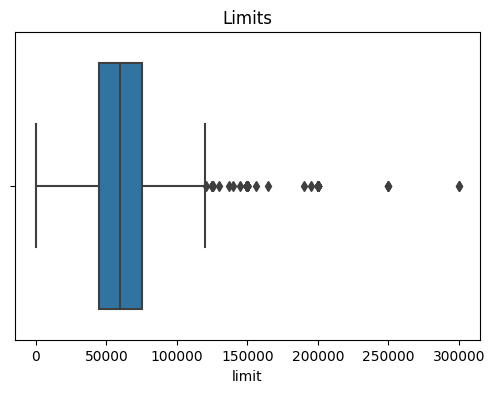

In [18]:
fig = plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='limit')
plt.title('Limits')

In [19]:
z = np.abs(stats.zscore(df['limit']))
df.drop(axis=0, index=df.loc[z>=3, 'limit'].index, inplace=True)

Удаляем выбросы.

Text(0.5, 1.0, 'Limits')

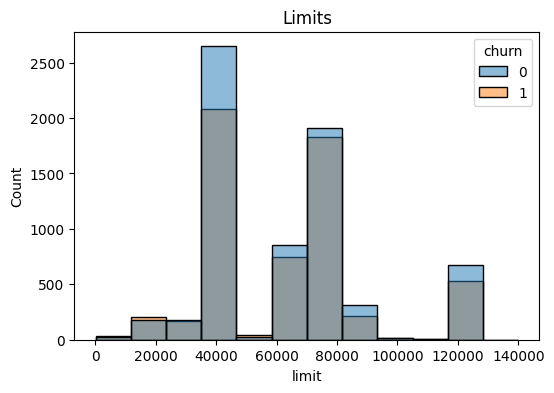

In [20]:
fig = plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='limit', hue='churn', bins=12)
plt.title('Limits')

<br>
<h4>Признак login</h4>
Количество заходов в  приложение по 3 месяцам

In [21]:
#NaN показывает нулевое количество заходов в приложение?
print('Nan в login_0:', df.loc[df['login_0'].isnull()].shape)
print('Nan в login_1:', df.loc[df['login_1'].isnull()].shape)
print('Nan в login_2:', df.loc[df['login_2'].isnull()].shape)

print(df.loc[df['login_0'] == 0].shape)
print(df.loc[df['login_1'] == 0].shape)
print(df.loc[df['login_2'] == 0].shape)

df.loc[df['login_0'].isnull(), 'login_0'] = 0
df.loc[df['login_1'].isnull(), 'login_1'] = 0
df.loc[df['login_2'].isnull(), 'login_2'] = 0


Nan в login_0: (116, 45)
Nan в login_1: (580, 45)
Nan в login_2: (1049, 45)
(0, 45)
(0, 45)
(0, 45)


Минимальное значение login = 1, при этом присутствуют строки, для которых login_0 is not null, а login_1 is null.<br>
Обозначим login = NaN, как 0 заходов в приложение.<br>
Для 116 клиентов количество заходов во все 3 месяца = NaN.<br><br>

In [22]:
logins = ['login_0', 'login_1', 'login_2']
print(df[logins].describe())

       login_0  login_1  login_2
count 12702.00 12702.00 12702.00
mean      9.38    11.43    11.07
std      11.14    12.44    14.29
min       0.00     0.00     0.00
25%       3.00     4.00     3.00
50%       6.00     8.00     7.00
75%      11.00    15.00    15.00
max     305.00   195.00   502.00


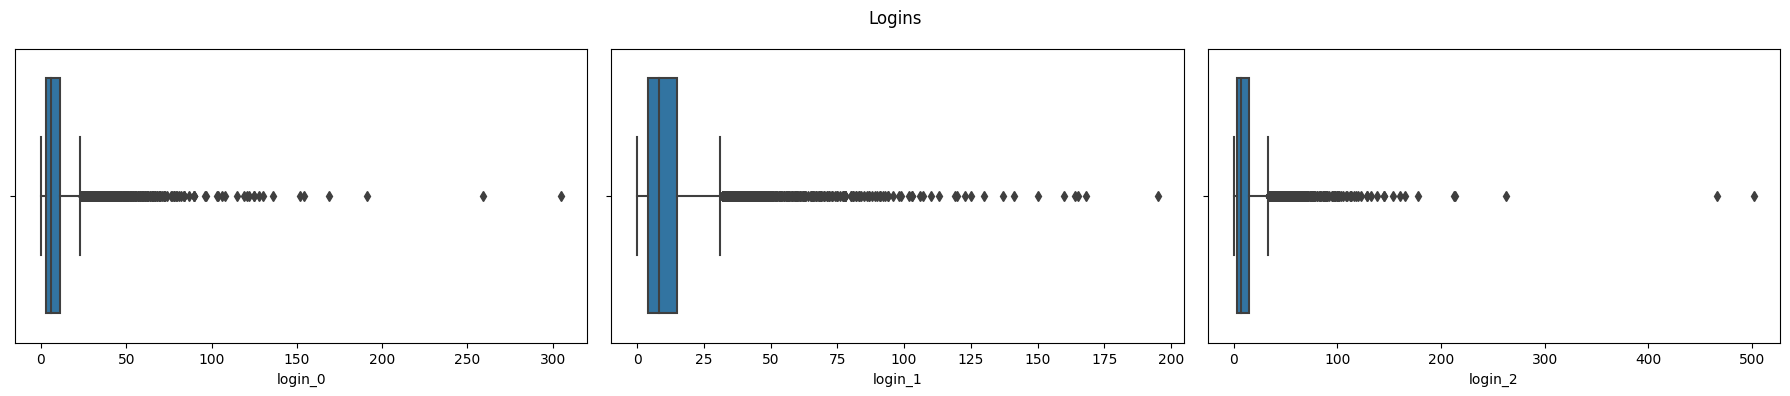

In [23]:
fig = plt.figure(figsize=(len(logins) * 6, 4))
for i, feat_name in enumerate(logins):
    ax = fig.add_subplot(1, len(logins), i+1)
    sns.boxplot(data=df, x=feat_name)
    fig.suptitle('Logins')
plt.tight_layout()

In [24]:
z = np.abs(stats.zscore(df['login_0']))
df.drop(axis=0, index=df.loc[z>=3, 'login_0'].index, inplace=True)

z = np.abs(stats.zscore(df['login_1']))
df.drop(axis=0, index=df.loc[z>=3, 'login_1'].index, inplace=True)

z = np.abs(stats.zscore(df['login_2']))
df.drop(axis=0, index=df.loc[z>=3, 'login_2'].index, inplace=True)

Удаляем выбросы.

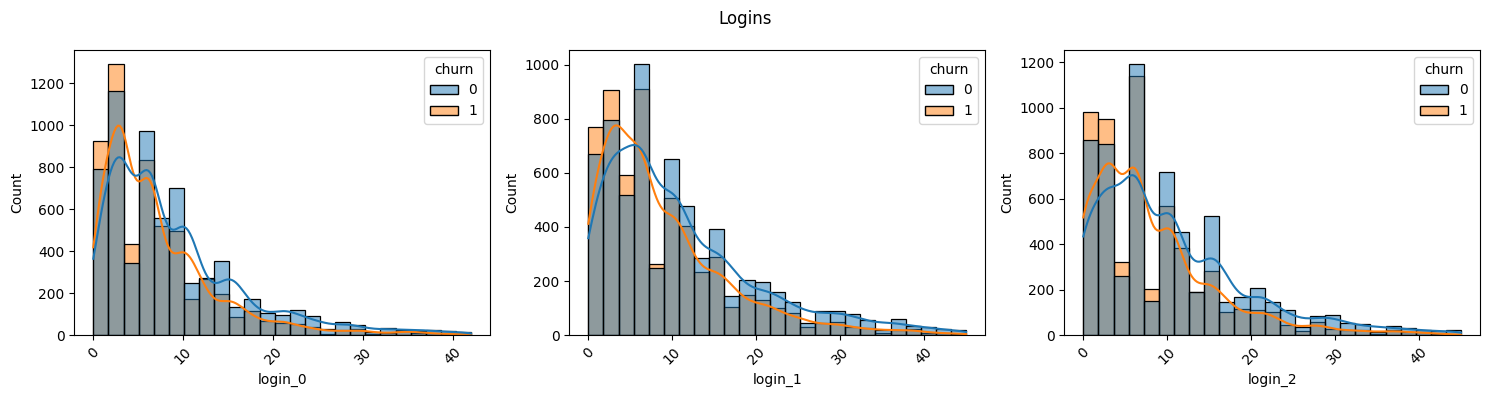

In [25]:
fig = plt.figure(figsize=(len(logins) * 5, 4))
for i, feat_name in enumerate(logins):
    ax = fig.add_subplot(1, len(logins), i+1)
    sns.histplot(data = df, x=feat_name, hue='churn', bins=25, kde=True, axes=ax)
    fig.suptitle('Logins')
    plt.xticks(rotation=45)
plt.tight_layout()

Клиенты, у которых количество заходов в приложение в 3 месяце близко к 0 чаще уходят.

<br>
<h4>Признак withdraw</h4>
Доля снятий кредитных по 3 месяцам.

In [26]:
withdraws = ['withdraw0', 'withdraw1', 'withdraw2']
print(df[withdraws].describe())

       withdraw0  withdraw1  withdraw2
count   12125.00   12125.00   12125.00
mean        0.08       0.08       0.05
std         0.20       0.21       0.18
min         0.00       0.00       0.00
25%         0.00       0.00       0.00
50%         0.00       0.00       0.00
75%         0.00       0.00       0.00
max         1.00       1.00       1.00


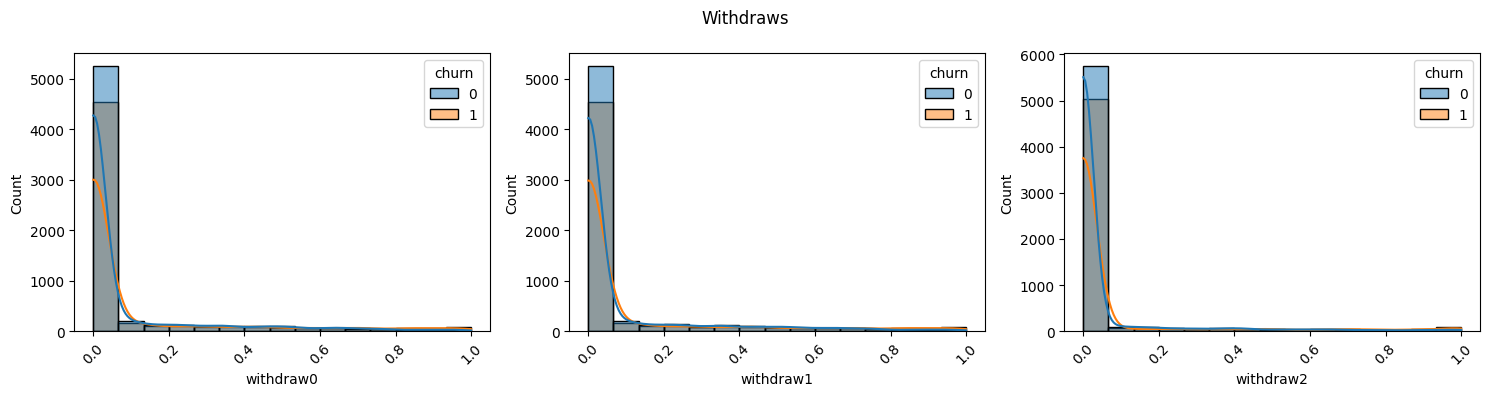

In [27]:
fig = plt.figure(figsize=(len(withdraws) * 5, 4))
for i, feat_name in enumerate(withdraws):
    ax = fig.add_subplot(1, len(withdraws), i+1)
    sns.histplot(data = df, x=feat_name, hue='churn', bins=15, kde=True, axes=ax)
    fig.suptitle('Withdraws')
    plt.xticks(rotation=45)
plt.tight_layout()

<br>
<h4>Признак cred_tran_nopartnershare</h4>
Доля покупок кредитными не у партнеров по 3 месяцам

In [28]:
#непонятно почему NaN
print(df.loc[df['cred_tran_nopartnershare0'].isnull()].shape)
print(df.loc[df['cred_tran_nopartnershare1'].isnull()].shape)
print(df.loc[df['cred_tran_nopartnershare2'].isnull()].shape)


# temp = df[['cred_tran_nopartnershare0', 'tran_amt0', 'count_tran0']].copy()
# temp['CRED_TRAN_AMT'] = df['limit'] - df['FREE_LIMIT0']

# print(temp.loc[temp['cred_tran_nopartnershare0'].isnull()].head(5))

# print(temp.loc[temp['cred_tran_nopartnershare0'] == 0].head(5))
# print(temp.head(5))
# temp.loc[temp['cred_tran_nopartnershare0'].notnull()].agg(
#     Mean=('cred_tran_nopartnershare0', np.mean),
#     Median=('cred_tran_nopartnershare0', np.median))



(6488, 45)
(4544, 45)
(4289, 45)


Для cred_tran_nopartnershare0 количество пустых значений <b>6488</b>,<br>
для cred_tran_nopartnershare1 количество пустых значений <b>4544</b>,<br>
для cred_tran_nopartnershare2 количество пустых значений <b>4289</b>.<br><br>

In [29]:
cred_tran_nopartnershares = ['cred_tran_nopartnershare0', 'cred_tran_nopartnershare1', 'cred_tran_nopartnershare2']
print(df[cred_tran_nopartnershares].describe())

       cred_tran_nopartnershare0  cred_tran_nopartnershare1  \
count                    5637.00                    7581.00   
mean                        0.20                       0.52   
std                         0.16                       0.26   
min                         0.00                       0.00   
25%                         0.07                       0.32   
50%                         0.15                       0.53   
75%                         0.28                       0.73   
max                         0.92                       1.00   

       cred_tran_nopartnershare2  
count                    7836.00  
mean                        0.56  
std                         0.27  
min                         0.01  
25%                         0.35  
50%                         0.60  
75%                         0.78  
max                         1.00  


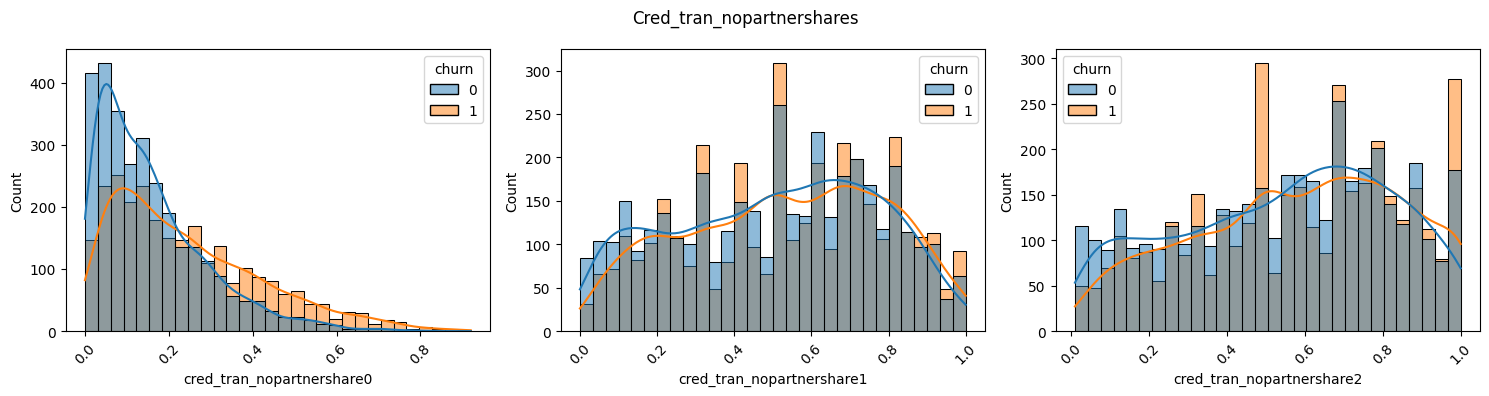

In [30]:
fig = plt.figure(figsize=(len(cred_tran_nopartnershares) * 5, 4))
for i, feat_name in enumerate(cred_tran_nopartnershares):
    ax = fig.add_subplot(1, len(cred_tran_nopartnershares), i+1)
    sns.histplot(data = df, x=feat_name, hue='churn', bins=30, kde=True, axes=ax)
    fig.suptitle('Cred_tran_nopartnershares')
    plt.xticks(rotation=45)
plt.tight_layout()

Клиенты, у которых значение признака доля покупок кредитными не у партнеров в первый месяц больше 0.3, чаще уходят.<br>
По графикам видно, что в первый месяц после активации большинство клиентов совершает кредитные транзакции у партенров. Во второй и третий месяц клиенты начинают совершать меньше кредитных покупок у партнеров.

<br>
<h4>Признаки cl_age</h4>
Возраст клиента.

In [31]:
print(df['cl_age'].describe())

count   12125.00
mean       45.86
std        13.08
min        20.00
25%        36.00
50%        45.00
75%        56.00
max        77.00
Name: cl_age, dtype: float64


Text(0.5, 1.0, 'CLient age')

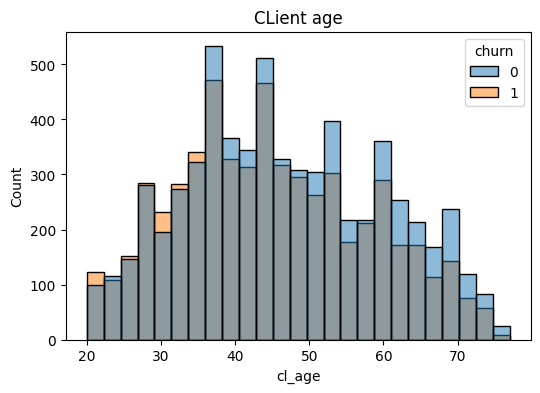

In [32]:
fig = plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='cl_age', hue='churn', bins=25)
plt.title('CLient age')

<br>
<h4>Признаки tran_prod, tran_remont, tran_inet</h4>
Количество покупок в "продуктах", "ремонте", "интернете"

In [33]:
print(df.loc[df['tran_prod'].isnull()].shape)
print(df.loc[df['tran_remont'].isnull()].shape)
print(df.loc[df['tran_inet'].isnull()].shape)

print('Количество значений = 0:')
print(df.loc[df['tran_prod'] == 0].shape)
print(df.loc[df['tran_remont'] == 0].shape)
print(df.loc[df['tran_inet'] == 0].shape)


#можно использовать только один drop, остальные пустые значения признаков удалятся
df.drop(axis=0, index=df[df['tran_prod'].isnull()].index, inplace=True)

print(df.loc[df['tran_prod'].isnull()].shape)
print(df.loc[df['tran_remont'].isnull()].shape)
print(df.loc[df['tran_inet'].isnull()].shape)


(300, 45)
(300, 45)
(300, 45)
Количество значений = 0:
(3788, 45)
(10964, 45)
(7725, 45)
(0, 45)
(0, 45)
(0, 45)


Пустые значения признаков tran_prod, tran_remont, tran_inet у одних и тех же клиентов.<br>
Множество значений признаков = 0.<br>
Большинство людей обычно не совершают покупки в категории ремонт и покупки в интернете.

In [34]:
print(df[['tran_prod', 'tran_remont', 'tran_inet']].describe())

       tran_prod  tran_remont  tran_inet
count   11825.00     11825.00   11825.00
mean        5.61         0.16       2.19
std         9.96         0.89       6.36
min         0.00         0.00       0.00
25%         0.00         0.00       0.00
50%         2.00         0.00       0.00
75%         7.00         0.00       1.00
max       171.00        27.00     150.00


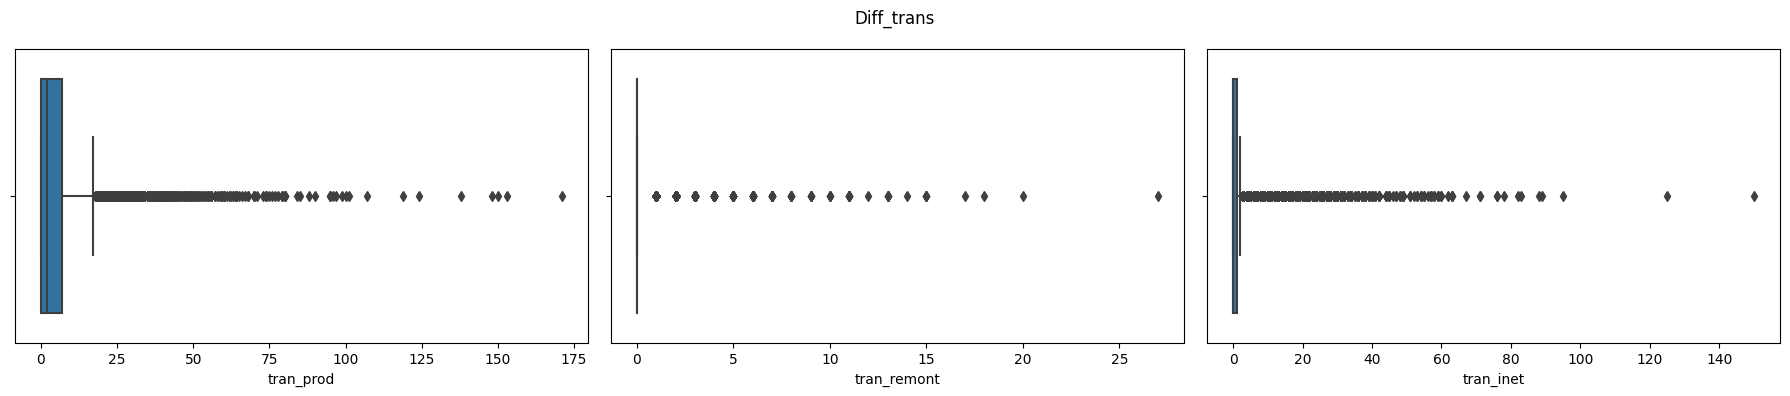

In [35]:
diff_trans = ['tran_prod', 'tran_remont', 'tran_inet']

fig = plt.figure(figsize=(len(diff_trans) * 6, 4))
for i, feat_name in enumerate(diff_trans):
    ax = fig.add_subplot(1, len(diff_trans), i+1)
    sns.boxplot(data=df, x=feat_name)
    fig.suptitle('Diff_trans')
plt.tight_layout()

In [36]:
z = np.abs(stats.zscore(df['tran_prod']))
df.drop(axis=0, index=df.loc[z>=3, 'tran_prod'].index, inplace=True)

z = np.abs(stats.zscore(df['tran_inet']))
df.drop(axis=0, index=df.loc[z>=3, 'tran_inet'].index, inplace=True)

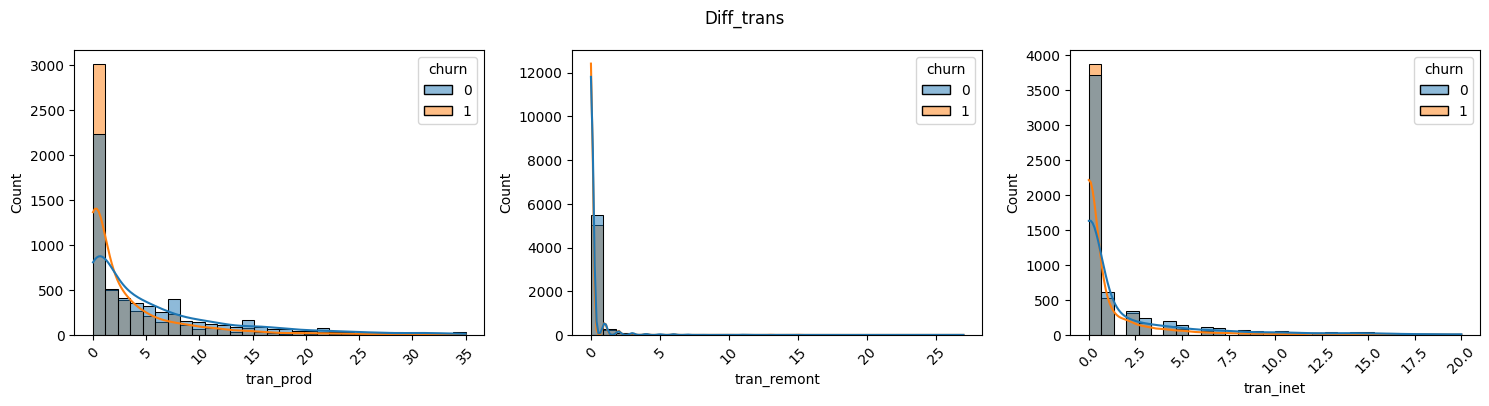

In [37]:
fig = plt.figure(figsize=(len(diff_trans) * 5, 4))
for i, feat_name in enumerate(diff_trans):
    ax = fig.add_subplot(1, len(diff_trans), i+1)
    sns.histplot(data = df, x=feat_name, hue='churn', bins=30, kde=True, axes=ax)
    fig.suptitle('Diff_trans')
    plt.xticks(rotation=45)
plt.tight_layout()

Клиенты, которые не совершают покупки в продуктовых, чаще уходят.

<br>
<h4>Признак CREDIT_TRAN_AMT_last_month</h4>
Сумма кредитных транзакций в предпоследний месяц

In [38]:
print(df['CREDIT_TRAN_AMT_last_month'].describe())

print('Nan:', df.loc[df['CREDIT_TRAN_AMT_last_month'].isnull()].shape)

print(df.loc[df['CREDIT_TRAN_AMT_last_month'].notnull()].groupby(by='tran_type_month2').agg(
    Mean=('CREDIT_TRAN_AMT_last_month', np.mean),
    Median=('CREDIT_TRAN_AMT_last_month', np.median),
    Count=('CREDIT_TRAN_AMT_last_month', np.shape)))

print(df.loc[df['CREDIT_TRAN_AMT_last_month'].isnull()].groupby(by='tran_type_month2').agg(
    Count=('CREDIT_TRAN_AMT_last_month', np.shape)))

count     8425.00
mean     12866.61
std      16073.74
min          0.27
25%       2430.00
50%       7058.72
75%      17538.38
max     240000.00
Name: CREDIT_TRAN_AMT_last_month, dtype: float64
Nan: (2925, 45)
                     Mean  Median    Count
tran_type_month2                          
CRED             11883.12 6590.18  (6066,)
CRED+DEB         15596.72 9297.70  (2323,)
DEB               4810.78  602.24    (18,)
oth                 21.30   20.00    (18,)
                    Count
tran_type_month2         
CRED                (70,)
CRED+DEB            (25,)
DEB               (2829,)
oth                  (1,)


Для большинства клиентов, для которых CREDIT_TRAN_AMT_last_month = NaN, tran_type_month2 = DEB.<br>
Для большинства клиентов, для которых CREDIT_TRAN_AMT_last_month != NaN, tran_type_month2 = CRED.<br>
<b>Стоит заполнить NaN значения соответствующим средним значением по типу операции?</b><br><br>

<AxesSubplot:xlabel='CREDIT_TRAN_AMT_last_month'>

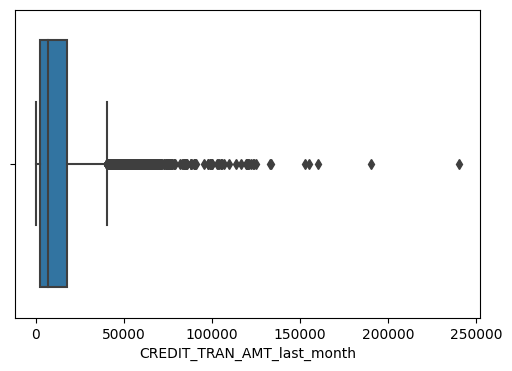

In [39]:
fig = plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='CREDIT_TRAN_AMT_last_month')

In [40]:
z = np.abs(stats.zscore(df['CREDIT_TRAN_AMT_last_month']))
df.drop(axis=0, index=df.loc[z>=3, 'CREDIT_TRAN_AMT_last_month'].index, inplace=True)

Text(0.5, 1.0, 'CREDIT_TRAN_AMT_last_month')

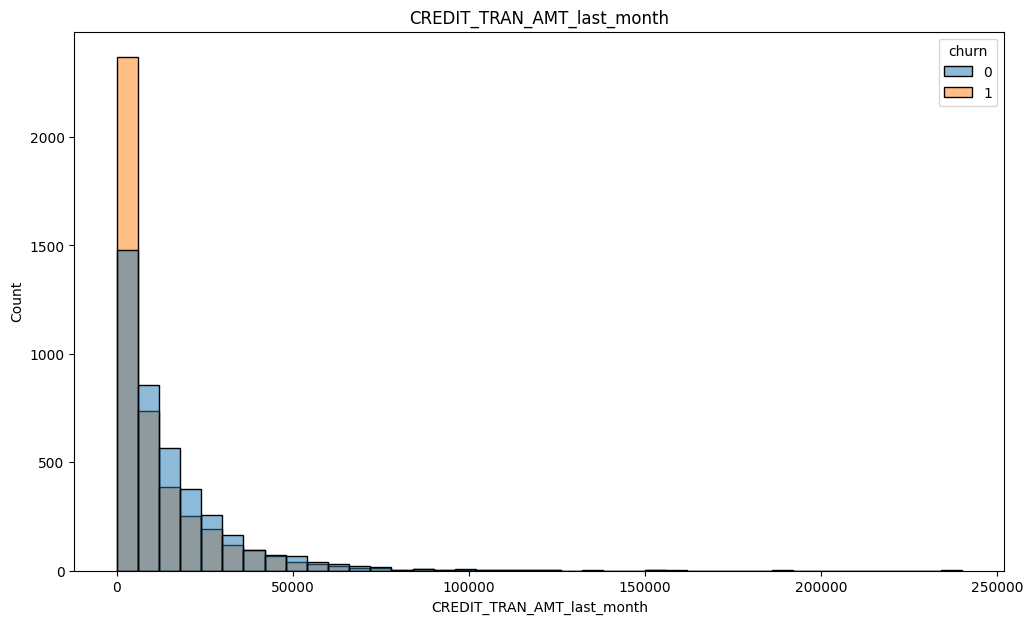

In [41]:
fig = plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='CREDIT_TRAN_AMT_last_month', hue='churn', bins=40)
plt.title('CREDIT_TRAN_AMT_last_month')

Клиенты, у которых значение признака CREDIT_TRAN_AMT_last_month (сумма кредитных транзакций в предпосл. месяц) близко к 0, чаще уходят.

<br>
<h4>Признак cl_income</h4>
Годовой доход.

In [42]:
print(df['cl_income'].describe())
print(df.loc[df['cl_income'] == -1].shape)
df.drop(axis=0, index=df.loc[df['cl_income'] == -1].index, inplace=True)

count      11350.00
mean      806344.50
std       879078.65
min           -1.00
25%       384000.00
50%       600000.00
75%       960000.00
max     36000000.00
Name: cl_income, dtype: float64
(224, 45)


Text(0.5, 1.0, 'Client income')

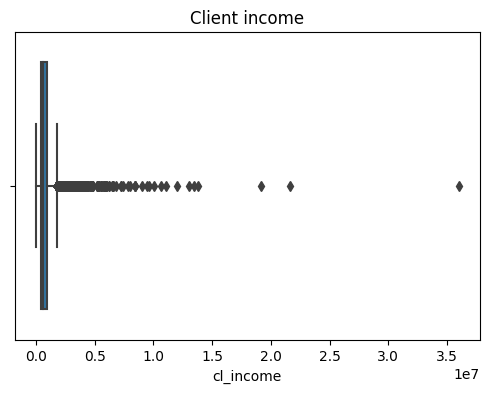

In [43]:
fig = plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='cl_income')
plt.title('Client income')

In [44]:
z = np.abs(stats.zscore(df['cl_income']))
df.drop(axis=0, index=df.loc[z>=3, 'cl_income'].index, inplace=True)

Text(0.5, 1.0, 'Client income')

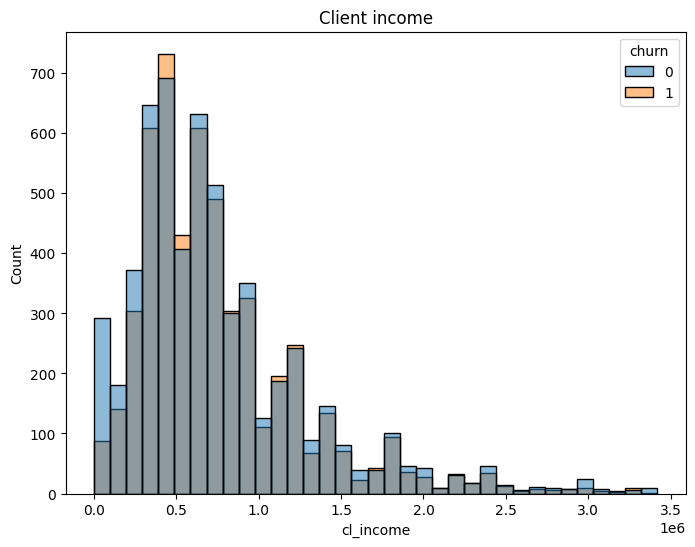

In [45]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='cl_income', hue='churn', bins=35)
plt.title('Client income')

<br>
<h4>Признак count_tran</h4>
Количество транзакций по 3 месяцам.

In [46]:
count_trans = ['count_tran0', 'count_tran1', 'count_tran2']
print(df[count_trans].describe())

       count_tran0  count_tran1  count_tran2
count     10967.00     10967.00     10967.00
mean         12.07        16.77        13.05
std          14.37        19.09        15.85
min           1.00         1.00         1.00
25%           3.00         4.00         3.00
50%           7.00        10.00         7.00
75%          16.00        23.00        17.00
max         151.00       195.00       151.00


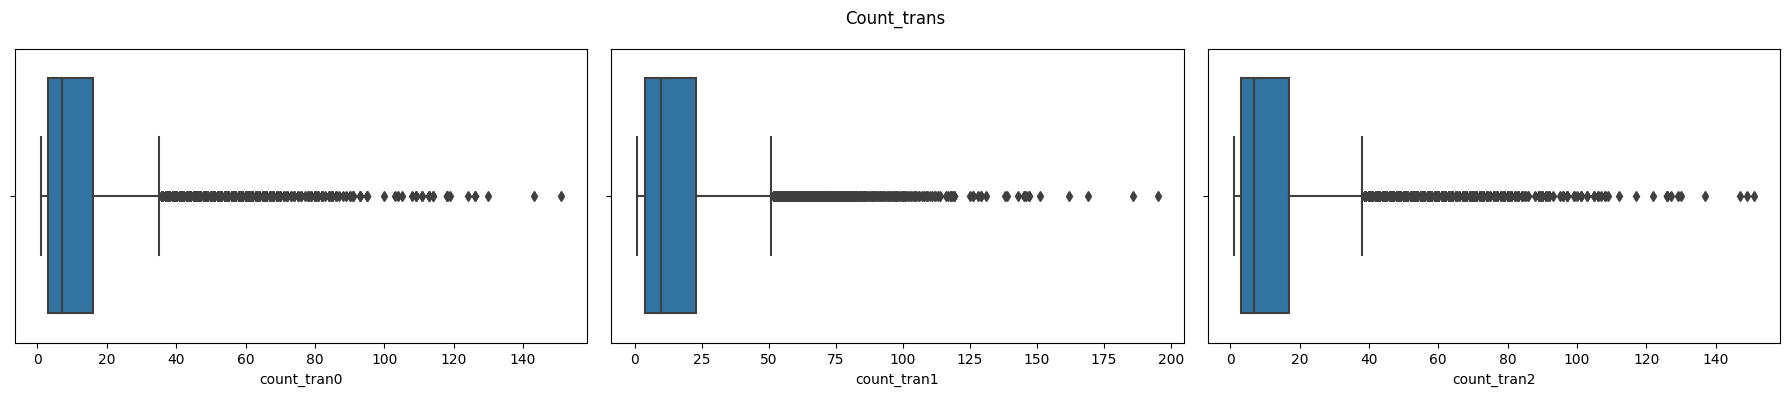

In [47]:
fig = plt.figure(figsize=(len(count_trans) * 6, 4))
for i, feat_name in enumerate(count_trans):
    ax = fig.add_subplot(1, len(count_trans), i+1)
    sns.boxplot(data=df, x=feat_name)
    fig.suptitle('Count_trans')
plt.tight_layout()

In [48]:
z = np.abs(stats.zscore(df['count_tran0']))
df.drop(axis=0, index=df.loc[z>=3, 'count_tran0'].index, inplace=True)

z = np.abs(stats.zscore(df['count_tran1']))
df.drop(axis=0, index=df.loc[z>=3, 'count_tran1'].index, inplace=True)

z = np.abs(stats.zscore(df['count_tran2']))
df.drop(axis=0, index=df.loc[z>=3, 'count_tran2'].index, inplace=True)

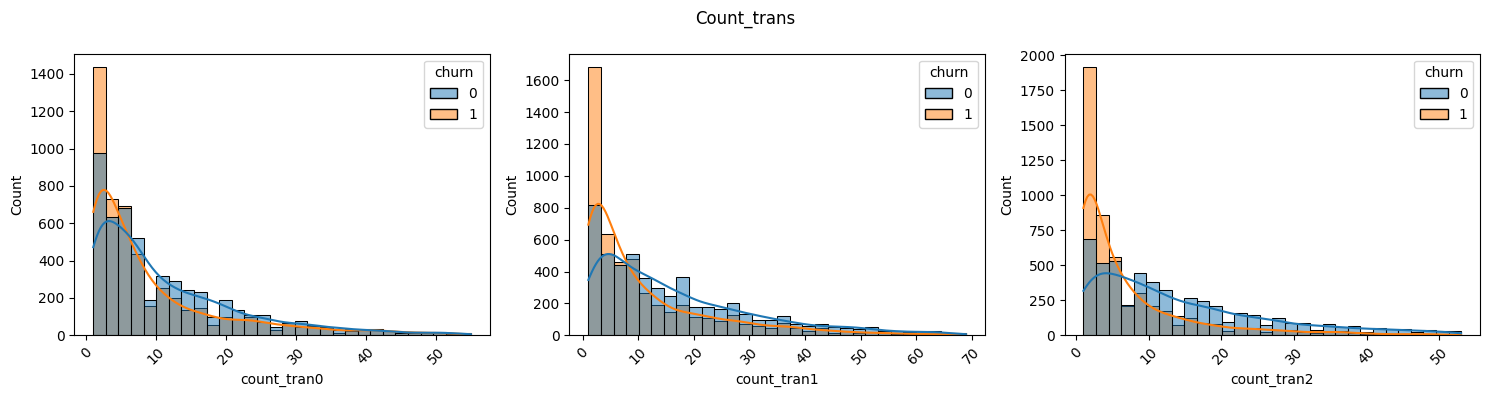

In [49]:
fig = plt.figure(figsize=(len(count_trans) * 5, 4))
for i, feat_name in enumerate(count_trans):
    ax = fig.add_subplot(1, len(count_trans), i+1)
    sns.histplot(data = df, x=feat_name, hue='churn', bins=30, kde=True, axes=ax)
    fig.suptitle('Count_trans')
    plt.xticks(rotation=45)
plt.tight_layout()

Клиенты, у которых количество транзакций в 3 месяц близко к 0 намного чаще уходят.<br>
По графикам видно, что по месяцам увеличивается количество людей, которые совершают очень мало транзакций, а также количество людей, которые становятся неактивными.

<br>
<h4>Признак tran_amt</h4>
Сумма  транзакций в месяц по 3 месяцам.

In [50]:
tran_amts = ['tran_amt0', 'tran_amt1', 'tran_amt2']
print(df[tran_amts].describe())

       tran_amt0  tran_amt1  tran_amt2
count   10272.00   10272.00   10272.00
mean    30820.43   19645.25   13816.10
std     38477.73   25411.94   20501.42
min         4.00       0.90       0.44
25%      7253.77    5000.00    2677.53
50%     20000.00   12191.24    7854.48
75%     43255.43   26048.14   17363.46
max    767644.36  717655.00  525464.70


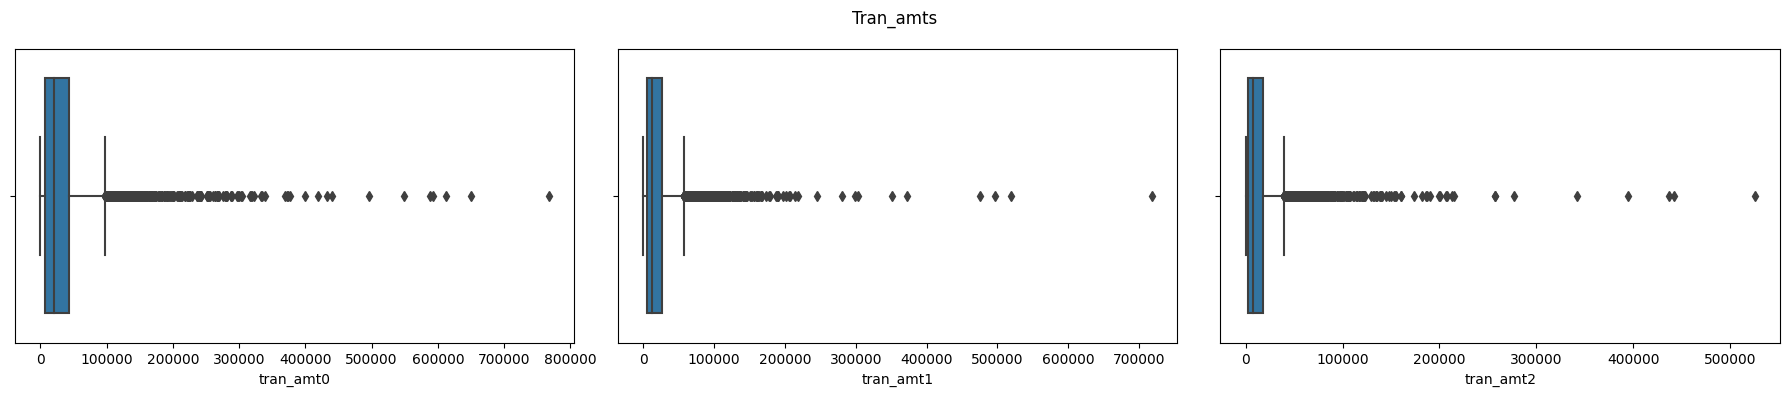

In [51]:
fig = plt.figure(figsize=(len(tran_amts) * 6, 4))
for i, feat_name in enumerate(tran_amts):
    ax = fig.add_subplot(1, len(tran_amts), i+1)
    sns.boxplot(data=df, x=feat_name)
    fig.suptitle('Tran_amts')
plt.tight_layout()

In [52]:
z = np.abs(stats.zscore(df['tran_amt0']))
df.drop(axis=0, index=df.loc[z>=3, 'tran_amt0'].index, inplace=True)

z = np.abs(stats.zscore(df['tran_amt1']))
df.drop(axis=0, index=df.loc[z>=3, 'tran_amt1'].index, inplace=True)

z = np.abs(stats.zscore(df['tran_amt2']))
df.drop(axis=0, index=df.loc[z>=3, 'tran_amt2'].index, inplace=True)

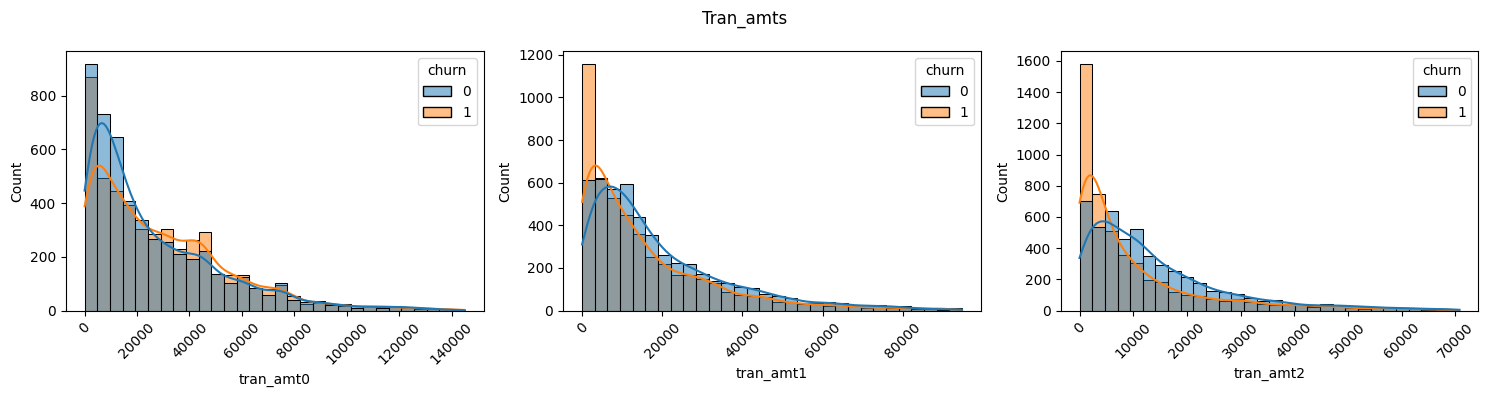

In [53]:
fig = plt.figure(figsize=(len(tran_amts) * 5, 4))
for i, feat_name in enumerate(tran_amts):
    ax = fig.add_subplot(1, len(tran_amts), i+1)
    sns.histplot(data = df, x=feat_name, hue='churn', bins=30, kde=True, axes=ax)
    fig.suptitle('Tran_amts')
    plt.xticks(rotation=45)
plt.tight_layout()

Клиенты, у которых сумма транзакций в 3 месяц равняется 0, чаще уходят.<br>
Возможен вариант, при котором клиент в первый месяц совершает покупку, а дальше сумма его транзакций во 2 и 3 месяцы стремится к 0.<br>
Возможен вариант, при котором сумма транзакций клиента в первый месяц мала, а дальше сумма его транзакций увеличивается.

<br>
<h4>Признак avg_amt_prod_3m, avg_amt_vnebs_3m, avg_amt_avto_3m, avg_amt_inet_3m</h4>
Средняя сумма в продуктах, непартнерах, авто и интернете за всю жизнь.

In [54]:
#возможно NaN показывает 0 среднюю сумму
print(df[['avg_amt_prod_3m', 'avg_amt_vnebs_3m', 'avg_amt_avto_3m', 'avg_amt_inet_3m']].describe())
print(df.loc[df['avg_amt_prod_3m'].isnull()].shape)
print(df.loc[df['avg_amt_vnebs_3m'].isnull()].shape)
print(df.loc[df['avg_amt_avto_3m'].isnull()].shape)
print(df.loc[df['avg_amt_inet_3m'].isnull()].shape)

# temp = df.copy()
# temp.loc[temp['avg_amt_prod_3m'].isnull(), 'avg_amt_prod_3m'] = 0
# temp.loc[temp['avg_amt_vnebs_3m'].isnull(), 'avg_amt_vnebs_3m'] = 0
# temp.loc[temp['avg_amt_avto_3m'].isnull(), 'avg_amt_avto_3m'] = 0
# temp.loc[temp['avg_amt_inet_3m'].isnull(), 'avg_amt_inet_3m'] = 0
# temp['sum'] = temp['avg_amt_prod_3m'] + temp['avg_amt_vnebs_3m'] + temp['avg_amt_avto_3m'] + temp['avg_amt_inet_3m']
# print(temp.loc[temp['avg_amt_inet_3m'] != 0]['churn'].value_counts())

       avg_amt_prod_3m  avg_amt_vnebs_3m  avg_amt_avto_3m  avg_amt_inet_3m
count          5856.00           8792.00          1708.00          2570.00
mean            774.74           1292.23          1528.30          3256.18
std             983.05           2901.11          2577.17          6396.12
min               4.25              1.00            20.00             0.01
25%             322.42            387.74           659.14           693.44
50%             544.01            648.38          1000.00          1462.05
75%             912.21           1150.38          1578.15          3019.80
max           28921.00          60823.00         40320.00         83420.00
(3972, 45)
(1036, 45)
(8120, 45)
(7258, 45)


Непонятные значения признаков. Много пустых значений. Нет значений = 0.<br>
Сделать avg_amt_prod_3m бинарным признаком?<br>
Сделать все признаки avg_amt... бинарными?

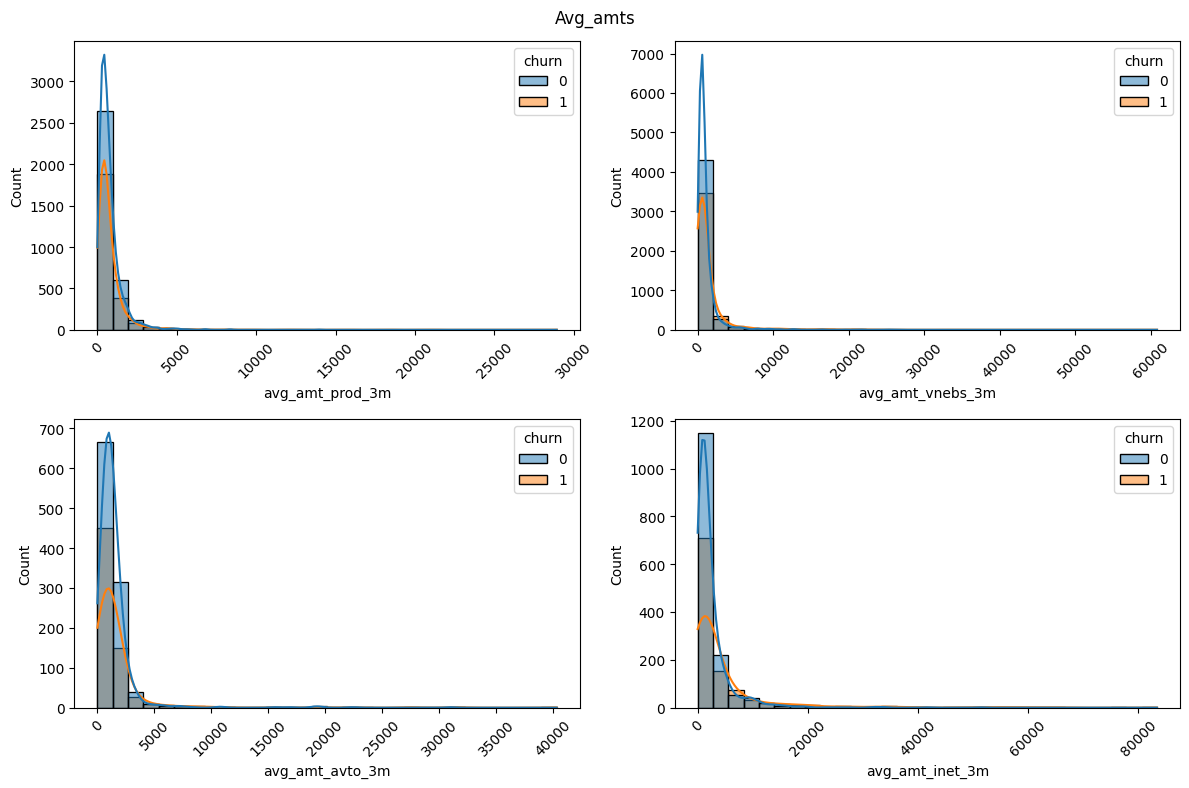

In [55]:
avg_amts = ['avg_amt_prod_3m', 'avg_amt_vnebs_3m', 'avg_amt_avto_3m', 'avg_amt_inet_3m']

fig = plt.figure(figsize=(12, 8))
for i, feat_name in enumerate(avg_amts):
    ax = fig.add_subplot(2, 2, i+1)
    sns.histplot(data = df, x=feat_name, hue='churn', bins=30, kde=True, axes=ax)
    fig.suptitle('Avg_amts')
    plt.xticks(rotation=45)
plt.tight_layout()

<br>
<hr>
<h3>Категориальные признаки</h3>
<br>

In [56]:
df[cat_feats].nunique()

pro0                         2
pro1                         2
pro2                         2
chastotta                    3
tran_type_month0             4
tran_type_month1             4
tran_type_month2             4
GENDER_ID                    3
CRED_TRAN_TOTAL              2
CL_CHILDREN_NO               8
City_Population_category     4
product_type                12
top_cat                     24
dtype: int64

In [57]:
for i in cat_feats:
    print(i, df[i].unique())

pro0 [1 0]
pro1 [1 0]
pro2 [1 0]
chastotta ['secondhalf' 'firsthalf' 'flat']
tran_type_month0 ['CRED' 'CRED+DEB' 'DEB' 'oth']
tran_type_month1 ['CRED+DEB' 'CRED' 'DEB' 'oth']
tran_type_month2 ['CRED' 'CRED+DEB' 'DEB' 'oth']
GENDER_ID [ 1.  2. -1. nan]
CRED_TRAN_TOTAL [1 0]
CL_CHILDREN_NO [-1.  0.  2.  1.  4.  3.  5.  9. nan]
City_Population_category ['300 – 700 тыс' '0 – 100 тыс' '>700 тыс' '100 – 300 тыс' nan]
product_type ['card only' 'only self pickup' 'PMM' 'plus credit' 'leads' 'outer CC'
 'OPS' 'STFC' 'plus deposit' 'auto' 'прочее' 'online']
top_cat ['Products' 'Furniture' 'Electronics' 'gas stations' nan
 'Интернет-магазины' 'Repair' 'Cloth' 'Cafes and restaurants' 'unknown'
 'Cosmetics' 'Pharmacies' 'Sport' 'Childens goods' 'Health' 'Other' 'Auto'
 'Jewelry' 'beauty' 'Insurance' 'Pet supplies' 'Gifts and Entertainment'
 'Taxi' 'Trips' 'Services']


Что означает <b>GENDER_ID = -1</b>?
Что означает <b>CL_CHILDREN_NO = -1</b>?<br><br>

In [58]:
df[cat_feats].isnull().any(axis=0)

pro0                        False
pro1                        False
pro2                        False
chastotta                   False
tran_type_month0            False
tran_type_month1            False
tran_type_month2            False
GENDER_ID                    True
CRED_TRAN_TOTAL             False
CL_CHILDREN_NO               True
City_Population_category     True
product_type                False
top_cat                      True
dtype: bool

<b>4</b> признака содержат пустые значения

<br>
<h4>Признак pro</h4>
Подписка про 3 месяцам.

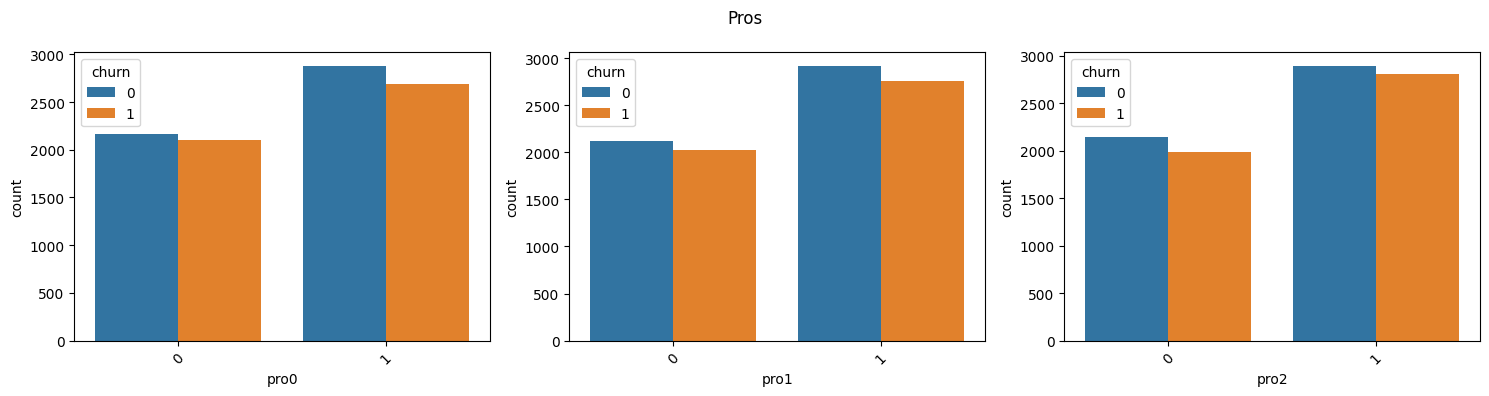

In [59]:
pros = ['pro0', 'pro1', 'pro2']
fig = plt.figure(figsize=(len(pros) * 5, 4))
for i, feat_name in enumerate(pros):
    ax = fig.add_subplot(1, len(pros), i+1)
    sns.countplot(data = df, x=feat_name, hue='churn', axes=ax)
    fig.suptitle('Pros')
    plt.xticks(rotation=45)
plt.tight_layout()

<br>
<h4>Признак chastotta</h4>
Чаще покупает в первую/вторую половину месяца, либо одинаково.

Text(0.5, 1.0, 'Chastota')

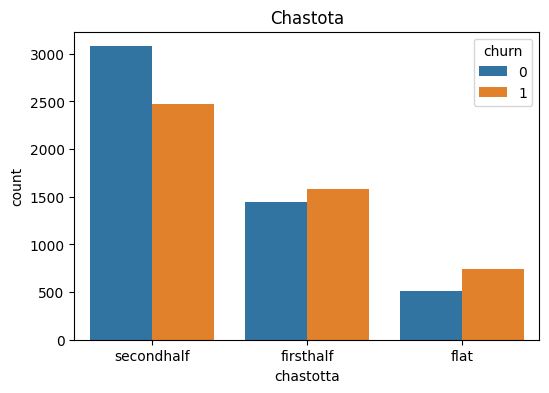

In [60]:
fig2 = plt.figure(figsize=(6, 4))
sns.countplot(data = df, x='chastotta', hue='churn')
plt.title('Chastota')

По графику видно, что люди чаще всего покупают во второй половине месяца.<br>

<br>
<h4>Признак tran_type_month</h4>
Тип транзакции по 3 месяцам.

In [61]:
tran_types = ['tran_type_month0', 'tran_type_month1', 'tran_type_month2']

In [62]:
print(df.loc[df['tran_type_month0'] == 'oth'].shape)
print(df.loc[df['tran_type_month1'] == 'oth'].shape)
print(df.loc[df['tran_type_month2'] == 'oth'].shape)

(15, 45)
(24, 45)
(18, 45)


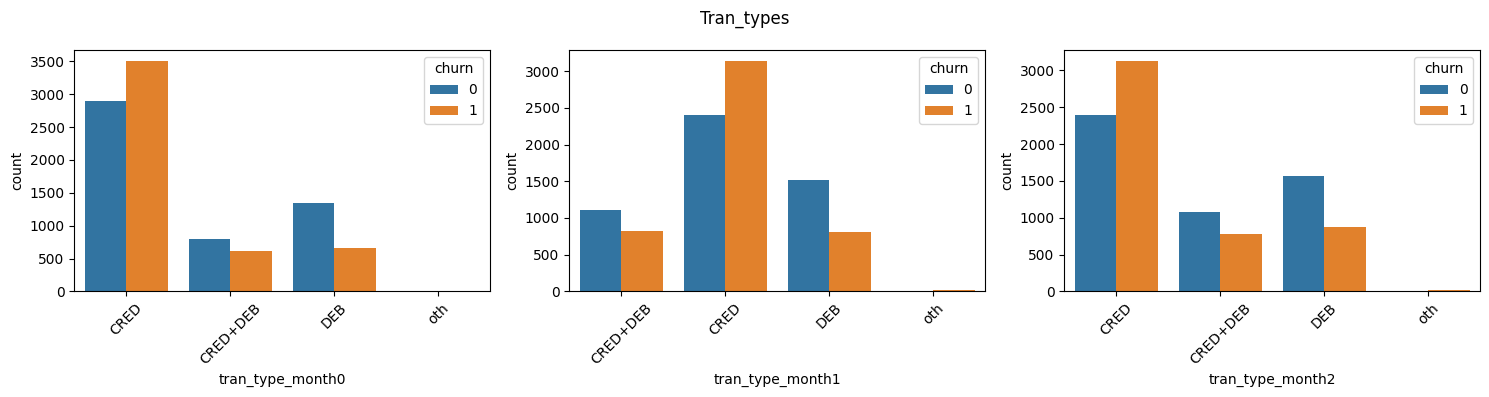

In [63]:
fig = plt.figure(figsize=(len(tran_types) * 5, 4))
for i, feat_name in enumerate(tran_types):
    ax = fig.add_subplot(1, len(tran_types), i+1)
    sns.countplot(data = df, x=feat_name, hue='churn', axes=ax)
    fig.suptitle('Tran_types')
    plt.xticks(rotation=45)
plt.tight_layout()

In [64]:
df.drop(axis=0, index=df.loc[df['tran_type_month0'] == 'oth'].index, inplace=True)
df.drop(axis=0, index=df.loc[df['tran_type_month1'] == 'oth'].index, inplace=True)
df.drop(axis=0, index=df.loc[df['tran_type_month2'] == 'oth'].index, inplace=True)

Клиенты, соверщающие только кредитные транзакции, чаще уходят.<br>
Большинство клиентов совершают кредитные транзакции.

<br>
<h4>Признак GENDER_ID, CL_CHILDREN_NO</h4>
Пол и количество детей.

In [65]:
#одна строка с NaN, один и тот же человек для GENDER_ID И CHILDREN_NO
print(df.loc[df['GENDER_ID'].isnull()].index)
print(df.loc[df['CL_CHILDREN_NO'].isnull()].index)

df.drop(axis=0, index=df.loc[df['GENDER_ID'].isnull()].index, inplace=True)

print(df.loc[df['GENDER_ID'].isnull()].shape)
print(df.loc[df['CL_CHILDREN_NO'].isnull()].shape)


Int64Index([7522], dtype='int64', name='id')
Int64Index([7522], dtype='int64', name='id')
(0, 45)
(0, 45)


In [66]:
print(df['GENDER_ID'].value_counts())
df.drop(axis=0, index=df.loc[df['GENDER_ID'] == -1].index, inplace=True)

1.00     5920
2.00     3817
-1.00      33
Name: GENDER_ID, dtype: int64


In [67]:
print(df['CL_CHILDREN_NO'].value_counts())
print(df.groupby(by='CL_CHILDREN_NO').agg(
    Min=('cl_age', np.min),
    Mean=('cl_age', np.mean)
))

0.00     5645
-1.00    3331
1.00      456
2.00      232
3.00       60
4.00        9
5.00        3
9.00        1
Name: CL_CHILDREN_NO, dtype: int64
                Min  Mean
CL_CHILDREN_NO           
-1.00            20 45.52
0.00             20 47.86
1.00             21 40.61
2.00             23 38.22
3.00             25 38.32
4.00             39 41.11
5.00             32 37.67
9.00             39 39.00


Одна нулевая строка признаков GENDER_ID и CL_CHILDREN_NO для одного и того же клиента.<br>
Для признака GENDER_ID (пол) пристутствует значение -1 для 33 клиентов (были удалены).<br>
Для признака CL_CHILDREN_NO (количество детей) присутствует значение -1 для 3331 клиентов.<br>
Что означает <b>CL_CHILDREN_NO = -1</b>?<br>
Предположил, что CL_CHILDREN_NO = -1 ==> дети, достигшие 18 лет, но это не так (проверил по возрасту клиентов).<br><br>

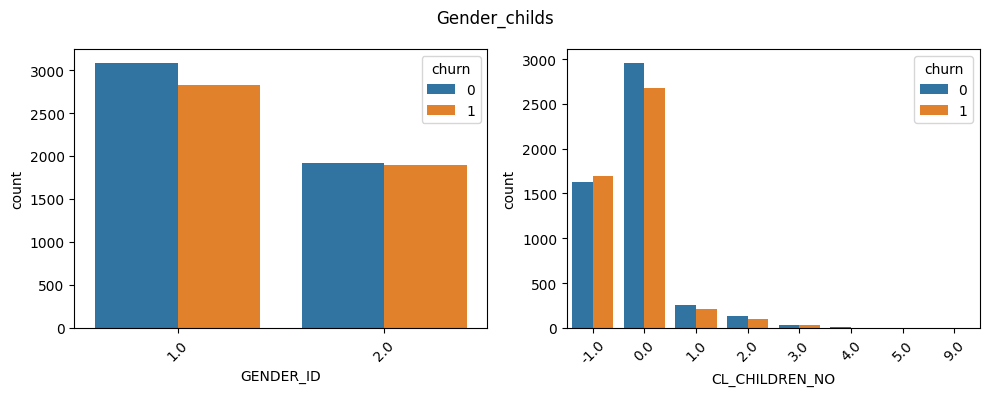

In [68]:
gender_childs = ['GENDER_ID', 'CL_CHILDREN_NO']
fig = plt.figure(figsize=(len(gender_childs) * 5, 4))
for i, feat_name in enumerate(gender_childs):
    ax = fig.add_subplot(1, len(gender_childs), i+1)
    sns.countplot(data = df, x=feat_name, hue='churn', axes=ax)
    fig.suptitle('Gender_childs')
    plt.xticks(rotation=45)
plt.tight_layout()

<br>
<h4>Признак CRED_TRAN_TOTAL</h4>
Количество кредитных покупок всего.

<AxesSubplot:xlabel='CRED_TRAN_TOTAL', ylabel='count'>

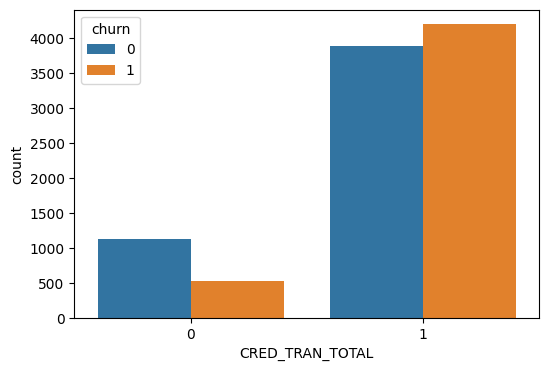

In [69]:
fig2 = plt.figure(figsize=(6, 4))
sns.countplot(data = df, x='CRED_TRAN_TOTAL', hue='churn')

<br>
<h4>Признак City_Population_category</h4>
Масштаб города.

In [70]:
print('Nan', df.loc[df['City_Population_category'].isnull()].shape)
print(df.groupby(by='City_Population_category').agg(
    Min=('cl_income', np.min),
    Max=('cl_income', np.max),
    Mean=('cl_income', np.mean),
    Median=('cl_income', np.median)))


Nan (668, 45)
                          Min        Max      Mean    Median
City_Population_category                                    
0 – 100 тыс              0.00 3396000.00 610443.12 492000.00
100 – 300 тыс            0.00 3120000.00 708859.99 600000.00
300 – 700 тыс            0.00 3402000.00 712724.47 600000.00
>700 тыс                 0.00 3420000.00 899892.18 720000.00


У 668 клиент City_Population_category = NaN.<br>
Пытался выявить взаимосвязть категории города и заработной платы в этих категориях.

Text(0.5, 1.0, 'City_population_category')

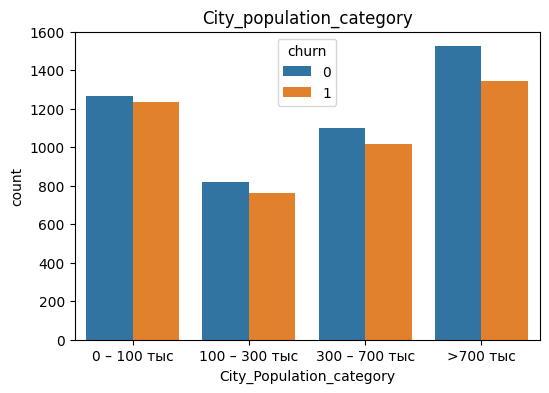

In [71]:
fig2 = plt.figure(figsize=(6, 4))
sns.countplot(data = df, x='City_Population_category', hue='churn', order=['0 – 100 тыс', '100 – 300 тыс', '300 – 700 тыс', '>700 тыс'])
plt.title('City_population_category')

<br>
<h4>Признак product_type</h4>
Тип продукта.

In [72]:
print(df['product_type'].value_counts())
df.drop(index=df.loc[(df['product_type'] == 'прочее') | (df['product_type'] == 'online')].index, axis=1, inplace=True)

leads               2175
only self pickup    2046
plus credit         1072
OPS                  886
STFC                 771
PMM                  763
outer CC             752
plus deposit         564
auto                 489
card only            205
прочее                11
online                 3
Name: product_type, dtype: int64


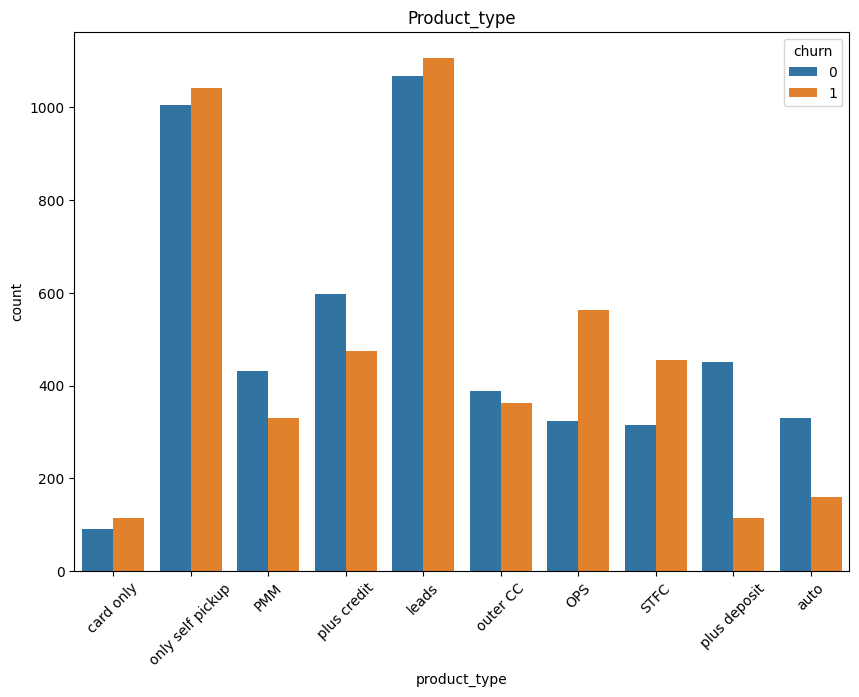

In [73]:
fig2 = plt.figure(figsize=(10, 7))
sns.countplot(data = df, x='product_type', hue='churn')
plt.xticks(rotation=45)
plt.title('Product_type')
plt.show()

<br>
<h4>Признак top_cat</h4>
Топ категория.

In [74]:
print('NaN:', df.loc[df['top_cat'].isnull()].shape)
print(df['top_cat'].value_counts())

NaN: (859, 45)
Products                   4703
gas stations                862
Electronics                 811
Furniture                   579
Cloth                       426
Pharmacies                  196
unknown                     190
Repair                      162
Интернет-магазины           156
Sport                       125
Cafes and restaurants       108
Jewelry                      96
Auto                         90
Cosmetics                    86
Taxi                         67
Other                        60
Gifts and Entertainment      29
Insurance                    27
Childens goods               27
Health                       23
beauty                       21
Pet supplies                 12
Services                      5
Trips                         3
Name: top_cat, dtype: int64


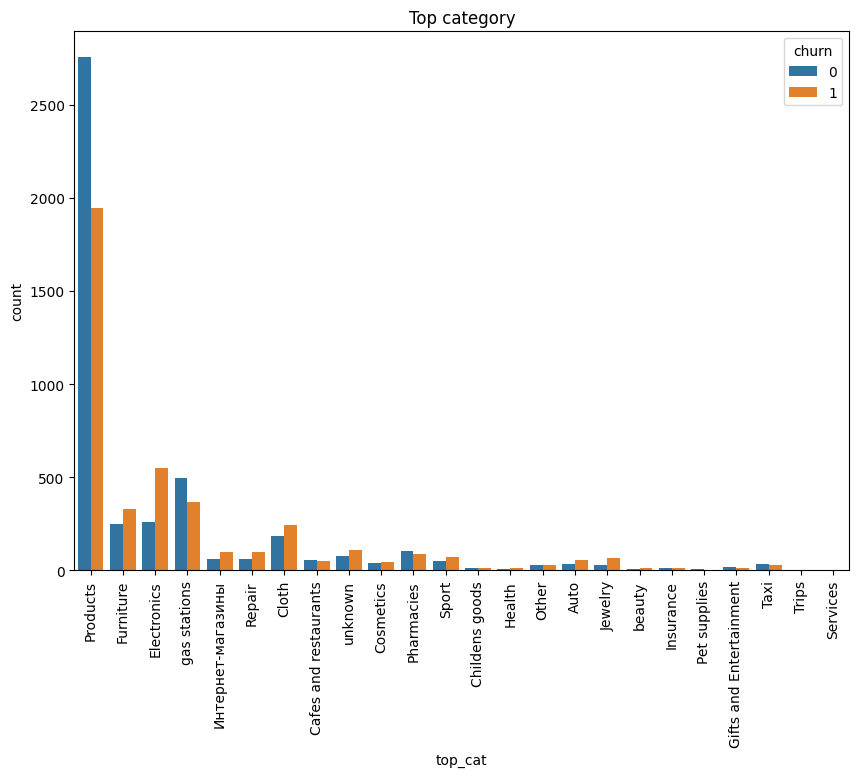

In [75]:
fig = plt.figure(figsize=(10, 7))
sns.countplot(data = df, x='top_cat', hue='churn')
plt.xticks(rotation=90)
plt.title('Top category')
plt.show()

In [76]:
df.loc[df['top_cat'] != 'Products', 'top_cat'] = 'Other'

Может быть стоит ввести только две категории Products и Other, NaN отнести к Other.<br>
Клиенты, для которых top_cat = Products, реже уходят.<br><br>

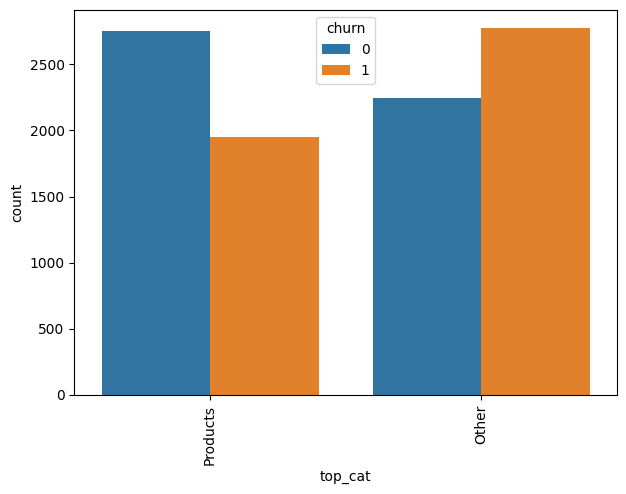

In [77]:
fig = plt.figure(figsize=(7, 5))
sns.countplot(data = df, x='top_cat', hue='churn')
plt.xticks(rotation=90)
plt.show()

<br>
<hr>
<br>

In [78]:
print(df.isnull().any(axis=0))

vydacha_dt                    False
activation_dt                 False
pro0                          False
pro1                          False
pro2                          False
chastotta                     False
tran_type_month0              False
tran_type_month1              False
tran_type_month2              False
FREE_LIMIT0                   False
FREE_LIMIT1                   False
FREE_LIMIT2                   False
limit                         False
login_0                       False
login_1                       False
login_2                       False
withdraw0                     False
withdraw1                     False
withdraw2                     False
cred_tran_nopartnershare0      True
cred_tran_nopartnershare1      True
cred_tran_nopartnershare2      True
cl_age                        False
GENDER_ID                     False
tran_prod                     False
tran_remont                   False
tran_inet                     False
CRED_TRAN_TOTAL             

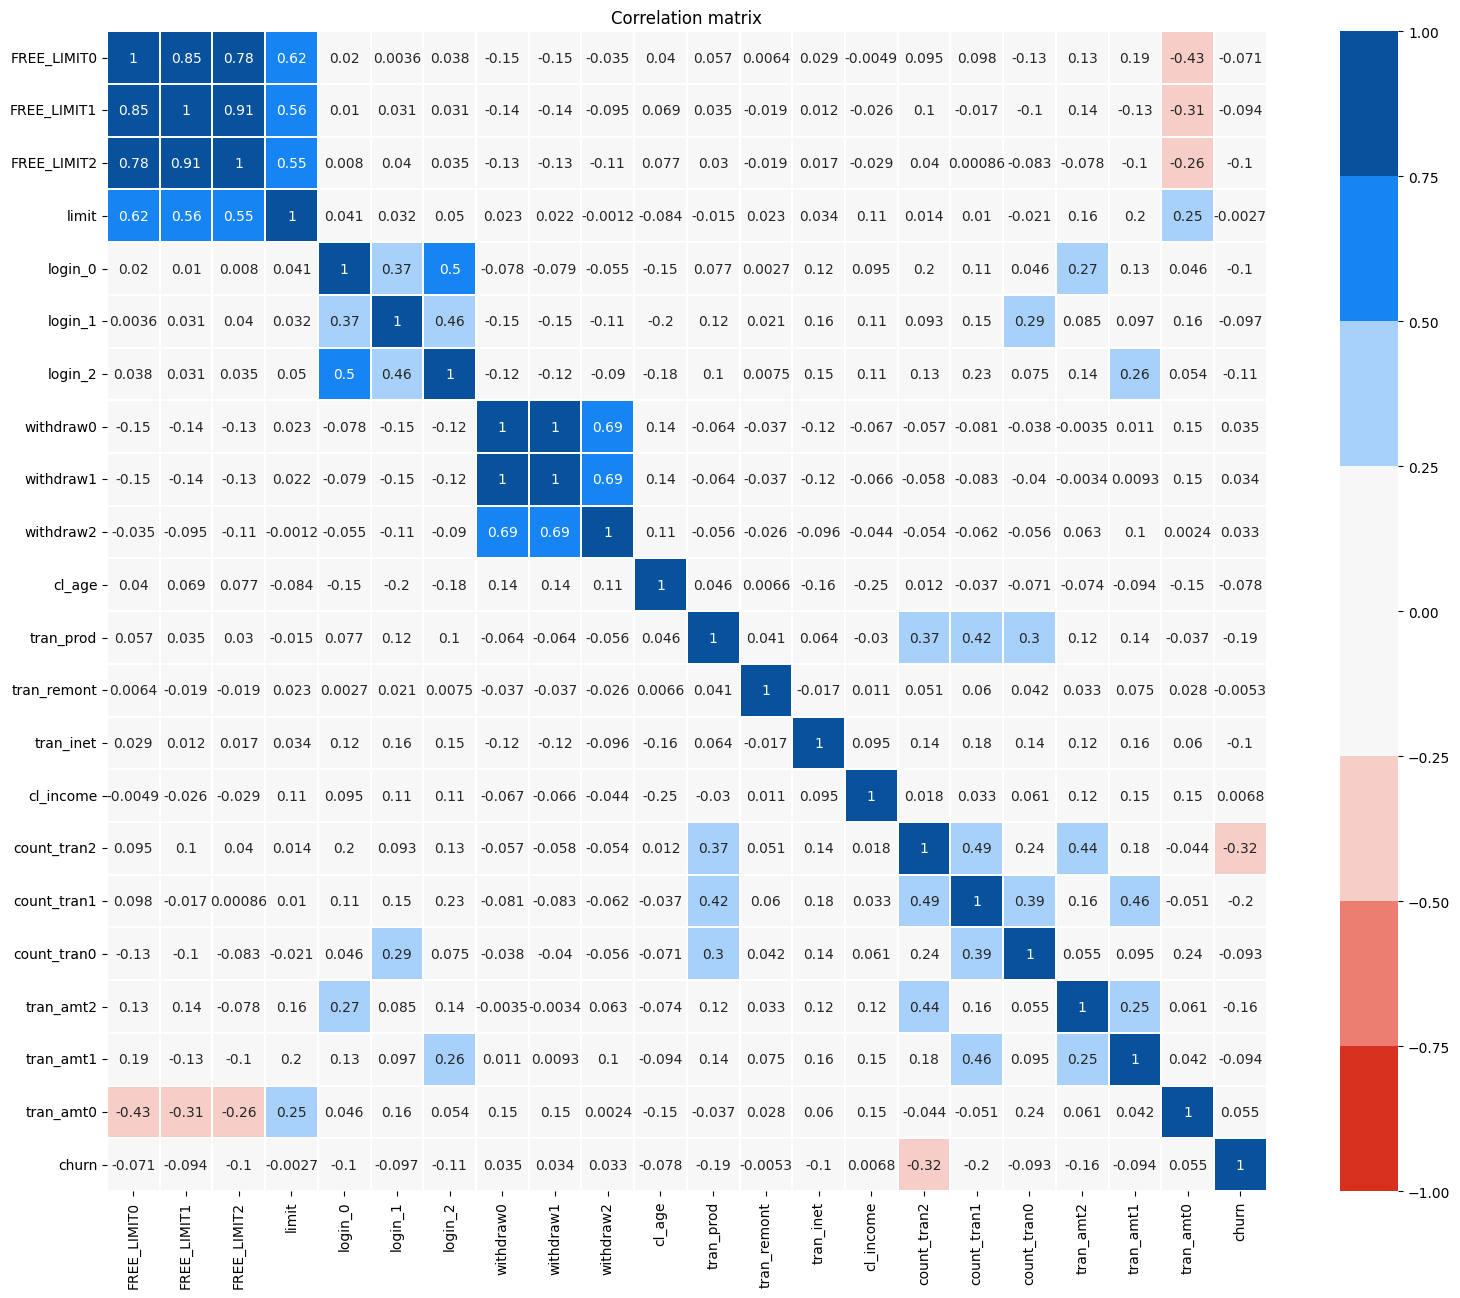

In [79]:
not_null_num_feats = df[num_feats].columns[df[num_feats].notnull().all(axis=0)].to_list()
n = df[not_null_num_feats + target].copy()

color_map = sns.color_palette(['#d7301f', '#eb7d71', '#f7cdc8', '#f7f7f7', '#f7f7f7', '#a7d1fa', '#1684f2', '#08519c'])

plt.figure(figsize=(16, 13))
ax = sns.heatmap(n.corr(), cmap=color_map, vmin=-1, vmax=1, square=True, linewidths=0.1, linecolor='white', annot=True)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()


In [80]:
df.drop(columns=['FREE_LIMIT0', 'FREE_LIMIT1', 'withdraw0', 'withdraw1'], axis=1, inplace=True)

In [81]:
null_cols = df.columns[df.isnull().any()]

date_feats = ['vydacha_dt', 'activation_dt']
cat_feats = ['pro0', 'pro1', 'pro2', 'chastotta', 'tran_type_month0', 'tran_type_month1', 'tran_type_month2', 'GENDER_ID', 'CRED_TRAN_TOTAL', 'CL_CHILDREN_NO', 'product_type']
num_feats = ['FREE_LIMIT2', 'limit', 'login_0', 'login_1', 'login_2', 'withdraw2',
             'cl_age', 'tran_prod', 'tran_remont', 'tran_inet', 'cl_income', 'count_tran2', 'count_tran1', 'count_tran0',
            'tran_amt2', 'tran_amt1', 'tran_amt0']
target = ['churn']

<br>
<hr>
<h3>RFM анализ</h3>
Recency (давность) у всех одинаковая, поэтому рассматривал только F и M.<br>
Frequency (частота) - количество транзакций в месяц.<br>
Monetary (вложения, сумма) - сумма транзакций в месяц.<br>
Анализ проводился по 3 месяцу.

In [82]:
rm = df.copy()
rm['frequency'] = rm['count_tran2'] #0.1 * rm['count_tran0'] + 0.2 * rm['count_tran1'] + 0.7 * rm['count_tran2'] 

rm['monetary'] = rm['tran_amt2'] #0.1 * rm['tran_amt0'] + 0.2 * rm['tran_amt1'] + 0.7 * rm['tran_amt2'] 

quantiles = rm.quantile(q=[0.33, 0.66, 1])
quantiles = quantiles.to_dict()


def rm_core(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3

rm['f'] = rm['frequency'].apply(rm_core, args=('frequency',quantiles,))
rm['m'] = rm['monetary'].apply(rm_core, args=('monetary',quantiles,))
rm['FM_score'] = rm.f.map(str) + rm.m.map(str)

active = rm.loc[rm['FM_score']=='33']
not_active = rm.loc[rm['FM_score']=='11']


In [83]:
print(active['churn'].value_counts())
print(not_active['churn'].value_counts())


print(active[num_feats].mean().T)
print('---------------------------------')
print(not_active[num_feats].mean().T)

0    1488
1     477
Name: churn, dtype: int64
1    1661
0     727
Name: churn, dtype: int64
FREE_LIMIT2    34242.00
limit          65570.91
login_0           10.51
login_1           10.89
login_2           10.78
withdraw2          0.05
cl_age            45.48
tran_prod          7.29
tran_remont        0.21
tran_inet          2.20
cl_income     807740.74
count_tran2       26.16
count_tran1       22.73
count_tran0       13.61
tran_amt2      26217.72
tran_amt1      25077.33
tran_amt0      27809.79
dtype: float64
---------------------------------
FREE_LIMIT2    34781.22
limit          61096.04
login_0            5.78
login_1            8.34
login_2            7.43
withdraw2          0.05
cl_age            46.23
tran_prod          2.16
tran_remont        0.12
tran_inet          0.85
cl_income     700073.48
count_tran2        1.96
count_tran1        8.69
count_tran0        8.41
tran_amt2       1370.65
tran_amt1      13591.42
tran_amt0      28392.28
dtype: float64


Клиенты, относящиеся к категории "11" - количество и сумма транзакций малые (неактивные клиенты).<br>
Клиенты, относящиеся к категории "33" - количество и сумма транзакций большие (активные клиенты).
<hr>

<br>
<h3>KMeans кластеризация</h3>

In [84]:
numerical_cols = ['FREE_LIMIT2', 'login_0', 'login_1', 'login_2',
                  'tran_prod', 'tran_remont', 'tran_inet', 'cl_income', 'count_tran2', 'count_tran1', 'count_tran0',
                  'tran_amt2', 'tran_amt1', 'tran_amt0']
categorical_cols = ['pro0', 'pro1', 'pro2', 'chastotta', 'tran_type_month0', 'tran_type_month1', 'tran_type_month2',
                   'GENDER_ID', 'CRED_TRAN_TOTAL', 'CL_CHILDREN_NO', 'product_type']

X_kmeans = df[numerical_cols]
X_kmeans_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X_kmeans), columns=X_kmeans.columns, index=X_kmeans.index)

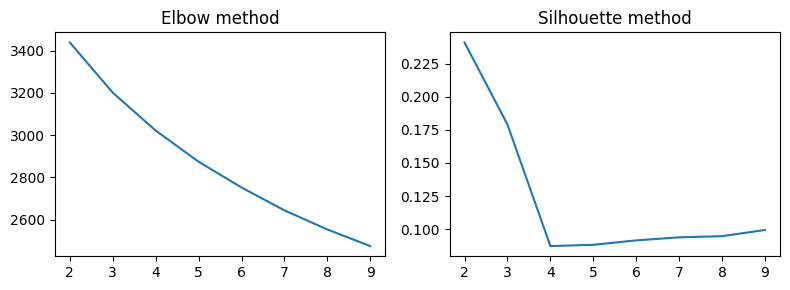

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

max_clusters = np.arange(2, 10)

inertias = []
silhouettes = []
for k in max_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X_kmeans_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_kmeans_scaled, kmeans.labels_))

fig = plt.figure(figsize=(8, 3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(max_clusters, inertias)
ax.set_title('Elbow method')
ax.set_xticks(np.arange(min(max_clusters), max(max_clusters)+1, 1.0))

ax = fig.add_subplot(1, 2, 2)
ax.plot(max_clusters, silhouettes)
ax.set_title('Silhouette method')
ax.set_xticks(np.arange(min(max_clusters), max(max_clusters)+1, 1.0))
fig.tight_layout()


C:\Users\andre\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\andre\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'TSNE')

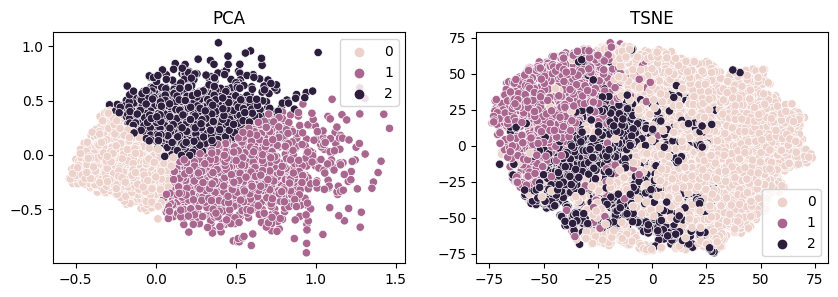

In [86]:
kmeans_model = KMeans(n_clusters=3).fit(X_kmeans_scaled)
X_pca_kmeans = PCA(n_components=2).fit_transform(X_kmeans_scaled)
X_tsne_kmeans = TSNE(n_components=2).fit_transform(X_kmeans_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10,3))

sns.scatterplot(x=X_pca_kmeans[:, 0], y=X_pca_kmeans[:, 1], ax=axes[0], hue=kmeans_model.labels_)
sns.scatterplot(x=X_tsne_kmeans[:, 0], y=X_tsne_kmeans[:, 1], ax=axes[1], hue=kmeans_model.labels_)
axes[0].set_title('PCA')
axes[1].set_title('TSNE')

0    5491
2    2262
1    1970
Name: label, dtype: int64
label               0         1         2
FREE_LIMIT2  36032.49  35315.85  29357.40
login_0          5.23      9.20     12.15
login_1          5.76     10.20     17.42
login_2          5.36     10.51     15.28
tran_prod        2.32     10.10      3.47
tran_remont      0.11      0.22      0.12
tran_inet        0.64      2.19      2.25
cl_income   652965.58 751466.66 942395.78
count_tran2      6.25     25.84      8.30
count_tran1      7.73     31.96     13.25
count_tran0      6.39     17.11     14.26
tran_amt2     8245.75  21015.49  13384.10
tran_amt1    11781.70  28638.81  21689.11
tran_amt0    23338.98  24733.83  39338.99


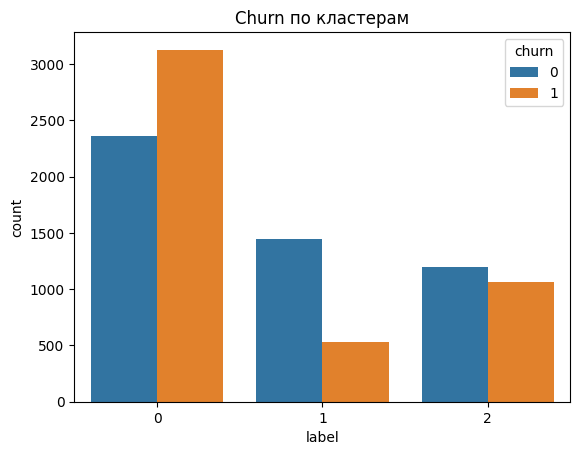

In [87]:
X_interp_kmeans = X_kmeans[X_kmeans_scaled.columns.to_list()].copy()
X_interp_kmeans['label'] = kmeans_model.labels_
print(X_interp_kmeans['label'].value_counts())
print(X_interp_kmeans.groupby('label').mean().T.round(2))
X_interp_kmeans = pd.concat([X_interp_kmeans, df['churn']], axis=1)

ax = sns.countplot(data=X_interp_kmeans, x='label', hue='churn')
ax.set_title('Churn по кластерам')
plt.show()

По средним значениям видно, что кластера отличаются друг от друга количеством и суммой транзакций, количеством покупок в продуктовых, количеством заходов в приложение.

<hr>
<h3>Построение модели</h3>

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import time
from collections import defaultdict

Text(0.5, 1.0, 'Churn distribution')

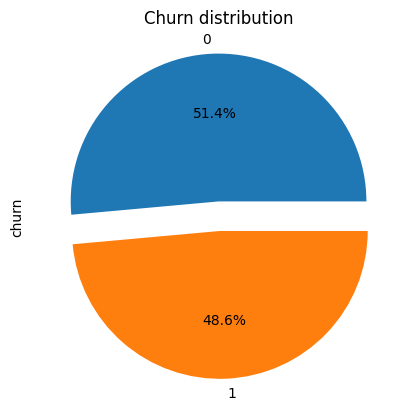

In [89]:
df['churn'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%').set_title("Churn distribution")

In [90]:
not_null_cols = df.columns[df.notnull().all()]
null_cols = df.columns[df.isnull().any()]
print(not_null_cols.to_list())
print(null_cols.to_list())

['vydacha_dt', 'activation_dt', 'pro0', 'pro1', 'pro2', 'chastotta', 'tran_type_month0', 'tran_type_month1', 'tran_type_month2', 'FREE_LIMIT2', 'limit', 'login_0', 'login_1', 'login_2', 'withdraw2', 'cl_age', 'GENDER_ID', 'tran_prod', 'tran_remont', 'tran_inet', 'CRED_TRAN_TOTAL', 'CL_CHILDREN_NO', 'cl_income', 'count_tran2', 'count_tran1', 'count_tran0', 'tran_amt2', 'tran_amt1', 'tran_amt0', 'churn', 'product_type', 'top_cat']
['cred_tran_nopartnershare0', 'cred_tran_nopartnershare1', 'cred_tran_nopartnershare2', 'CREDIT_TRAN_AMT_last_month', 'City_Population_category', 'avg_amt_prod_3m', 'avg_amt_vnebs_3m', 'avg_amt_avto_3m', 'avg_amt_inet_3m']


In [91]:
# numerical_cols = ['FREE_LIMIT2', 'limit', 'login_0', 'login_1', 'login_2', 'withdraw2', 'cl_age',
#                   'tran_prod', 'tran_remont', 'tran_inet', 'cl_income', 'count_tran2', 'count_tran1', 'count_tran0',
#                   'tran_amt2', 'tran_amt1', 'tran_amt0']
# categorical_cols = ['pro0', 'pro1', 'pro2', 'chastotta', 'tran_type_month0', 'tran_type_month1', 'tran_type_month2',
#                    'GENDER_ID', 'CRED_TRAN_TOTAL', 'CL_CHILDREN_NO', 'product_type']

numerical_cols = ['FREE_LIMIT2', 'login_2', 'cl_age',
                  'tran_prod', 'cl_income', 'count_tran2',
                  'tran_amt2']
categorical_cols = ['chastotta', 'tran_type_month2',
                   'CRED_TRAN_TOTAL', 'CL_CHILDREN_NO', 'product_type', 'top_cat']

numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', sparse=False))])

ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)]
)

X = ct.fit_transform(df)
y=df['churn'].copy().astype(int)

print(X.shape)

(9723, 33)


Количественные признаки масштабируются при помощи MinMaxScaler.<br>
Категориальные признаки кодируются при помощи OneHotEncoder.<br><br>

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.7,test_size=0.3)

Разбиваем датасет на обучающую и тестовую выборку (в каждой полученой выборке сохраняется примерное соотношение меток классов (0, 1), как в изначальном наборе данных).<br><br>

In [93]:
classifiers = {
    'LR': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

LR_grid = {'penalty': ['l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [500, 700, 1000]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.005, 0.05, 0.1]}

grid = {
    'LR': LR_grid,
    'KNN': KNN_grid,
    'SVC': SVC_grid,
    'RandomForest': RF_grid,
    'XGBoost': boosted_grid
}

Инициализируем классификаторы и параметры к ним для GridSearchCV.<br><br>

In [94]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Test accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_test, y_test)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Model: LR
Training time (mins): 0.07

Model: KNN
Training time (mins): 0.04

Model: RandomForest
Training time (mins): 0.42

Model: XGBoost
Training time (mins): 2.15



Обучение различных классификаторов на тестовой выборке с перебором различных параметров классификаторов.<br><br>

In [95]:
print(valid_scores)

      Classifer  Test accuracy  Training time
0            LR           0.67           0.07
1           KNN           0.61           0.04
2  RandomForest           0.69           0.42
3       XGBoost           0.69           2.15


In [96]:
print(clf_best_params)

{'LR': {'C': 0.75, 'max_iter': 500, 'penalty': 'l2'}, 'KNN': {'n_neighbors': 9, 'p': 1}, 'RandomForest': {'max_depth': 10, 'n_estimators': 400}, 'XGBoost': {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}}


In [97]:
best_classifiers = {
    "RandomForest" : RandomForestClassifier(**clf_best_params["RandomForest"]),
    "XGBoost" : XGBClassifier(**clf_best_params["XGBoost"]),
}

Наилучшая точность на тестовой выборке была достигнута классификаторами RandomForestClassifier и XGBClassifier.<br><br>

In [98]:
y_t = y.to_numpy()

FOLDS=3

for key, classifier in best_classifiers.items():
    start = time.time()
    
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True)
    
    score=0
    for fold, (train_idx, test_idx) in enumerate(cv.split(X, y_t)):
        # Get training and validation sets
        X_train_split, X_test_split = X[train_idx], X[test_idx]
        y_train_split, y_test_split = y_t[train_idx], y_t[test_idx]

        # Train model
        clf = classifier
        clf.fit(X_train_split, y_train_split)

        score += clf.score(X_test_split, y_test_split)

    # Среднее accuracy    
    score=score/FOLDS
    
    stop = time.time()

    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))

Model: RandomForest
Average validation accuracy: 69.1
Training time (mins): 0.12
Model: XGBoost
Average validation accuracy: 68.93
Training time (mins): 0.03


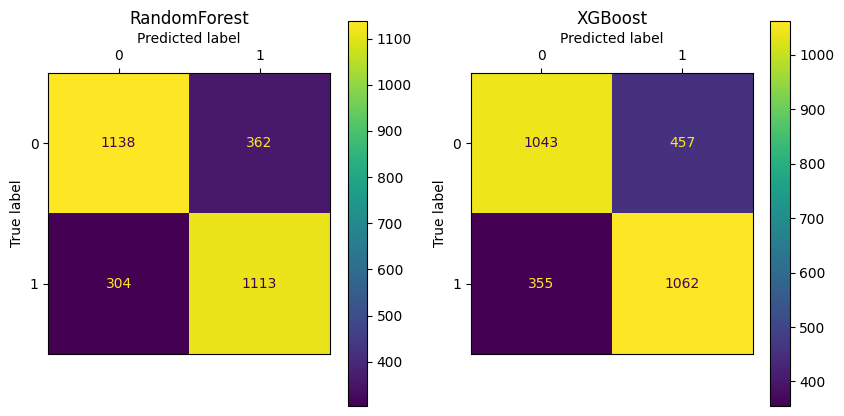

In [99]:
fig = plt.figure(figsize=(len(best_classifiers) * 5, 5))

for i, (clf_name, clf) in enumerate(best_classifiers.items()):
    y_pred = clf.predict(X_test)
    ax = fig.add_subplot(1, len(best_classifiers), i+1)
    ax.set_title(clf_name)
   
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot(ax=ax)

Матрицы ошибок y_test и y_pred для двух классификаторов.<br><br>

In [100]:
scores = defaultdict(list)
for name, clf in best_classifiers.items():
    y_pred = clf.predict(X_test)
    scores['Classifier'].append(name)

    for metric in [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_pred))

    score_df = pd.DataFrame(scores).set_index("Classifier")
    score_df.round(decimals=3)

score_df

,Accuracy,Precision,Recall,F1,Roc auc
Classifier,,,,,
RandomForest,0.77,0.75,0.79,0.77,0.77
XGBoost,0.72,0.70,0.75,0.72,0.72


Рассчет основных метрик оценки качества работы классификаторов.<br>
<hr>

Паттерны пведения, приводящие к оттоку:<br>
очень малое количество покупок в продуктовых и заходов в приложение, ежемесячное уменьшение количества и суммы транзакций.<br><br>

Условные контрольные точки, сигнализирующие об ухудшении поведения клиентов:<br>
сильное снижение количества заходов в приложение, снижение суммы и количества транзакций.<br><br>

Существуют клиенты, которые начинают пользоваться продуктами банка из-за выгодных акций, но после того, как клиент воспользуется акцией,<br>
он перестает пользоваться продуктом. Возможно стоит проводить заинтересовавшие клиента акции через определенное время,<br>
при условии, что клиент совершает некоторое количество транзакций в месяц и/или достигает определенной ежемесячной суммы транзацкий.<br><br>

Можно проводить внеплановые специализированные акции по интересующим клиента категориям, размещая акции в приложении банка,<br>
тем самым увеличивая количество заходов клиента в приложение и повышая активность клиента.<br>

Возможно стоит выявлять не только популярные категории, но и конкретные магазины, в которых большинство клиентов совершают покупки (по категориям), и проводить акции для конкретных магазинов (компаний).
